In [2]:
from utils import *
from api_calls import *
import pandas as pd
from IPython.display import HTML
from collections import Counter
import matplotlib.pyplot as plt
import networkx as nx
# from networkx.algorithms import bipartite
import datetime
import time
import numpy as np

In [4]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''') 

# Available data

### LN data (joined)

In [4]:
level1_folder = '../data/joined/level_1/'
level2_folder = '../data/joined/level_2/'
results_folder = '../data/joined/results/'

In [5]:
###############
channels = pd.read_csv(level2_folder + 'channel.csv')
nodes = pd.read_csv(level2_folder + 'node.csv')
ip_addresses = pd.read_csv(level2_folder + 'ip_address.csv')

In [19]:
# channels_friedhelm = pd.read_csv('../data/friedhelm/edge_state.csv')

In [6]:
###############
node_channels = dict()
for channel in channels.values:
    c, n1, n2 = channel
    if n1 not in node_channels:
        node_channels[n1] = set()
    node_channels[n1].add(c)
    if n2 not in node_channels:
        node_channels[n2] = set()
    node_channels[n2].add(c)

In [21]:
# for node, chnls in node_channels.items():
#     print(len(chnls), end=' ')

In [7]:
###############
node_alias = dict()
alias_node = dict()
for e in nodes.values:
    n = e[0]
    a = e[1]
    if n not in node_alias:
        node_alias[n] = set()
    node_alias[n].add(a)
    if a not in alias_node:
        alias_node[a] = set()
    alias_node[a].add(n)
    

In [9]:
# some nodes share the same alias
# for a, ns in alias_node.items():
#     if len(ns) > 1:
#         print(a, len(ns))
#         print()

In [23]:
results_folder = results_folder + 'relaxed_filtered_'

In [24]:
heuristic_2_entity_node_conf_star = read_json(results_folder + 'heuristic_2_entity_node_conf_star.json', double_int_key=True)
heuristic_2_node_entity_conf_star = read_json(results_folder + 'heuristic_2_node_entity_conf_star.json', True)
heuristic_2_entity_node_conf_snake_collector = read_json(results_folder + 'heuristic_2_entity_node_conf_snake_collector.json', double_int_key=True)
heuristic_2_node_entity_conf_snake_collector = read_json(results_folder + 'heuristic_2_node_entity_conf_snake_collector.json', True)
heuristic_2_entity_node_conf_all = read_json(results_folder + 'heuristic_2_entity_node_conf_all.json', double_int_key=True)
heuristic_2_node_entity_conf_all = read_json(results_folder + 'heuristic_2_node_entity_conf_all.json', True)
# for e, ns in heuristic_2_entity_node_conf_all[2].items():
#     if len(ns) > 1:
#         print(len(ns))

In [32]:
for e, ns in heuristic_2_entity_node_conf_snake_collector[2].items():
    if len(ns) > 2:
        print(len(ns))
        for n in ns:
            if n in node_alias:
                print(e, node_alias[n])

4
-6601 {'stak10'}
-6601 {'senza'}
-6601 {'relay1'}
-6601 {'stak7'}
3
-6569 {'lngames.net|LNGAMES.NET'}
-6569 {'tor.lngames.net'}
-6569 {'ln.popmin.net|ln01.popmin.net'}
3
-7152 {'LIGHTNING-CASINO.COM|LIGHTNING-CASINO.COM XYZ'}
-7152 {'NEURON'}
-7152 {'lightning-roulette.com'}
4
-7501 {'BOOYAH'}
-7501 {'captain'}
3
-5535 {'LNBIG.com [lnd-26]'}
-5535 {'LNBIG.com [lnd-33]'}
-5535 {'LNBIG.com [lnd-31]'}
8
-6105 {'LNBIG.com [lnd-32]'}
-6105 {'LNBIG.com [lnd-34]'}
-6105 {'LNBIG.com [lnd-38]'}
-6105 {'LNBIG.com [lnd-33]'}
-6105 {'LNBIG.com [lnd-31]'}
-6105 {'LNBIG.com [lnd-42]'}
-6105 {'LNBIG.com [lnd-26]'}
-6105 {'LNBIG.com [lnd-41]'}
8
-5546 {'LNBIG.com [lnd-07]'}
-5546 {'LNBIG.com [lnd-25]'}
-5546 {'LNBIG.com [lnd-28/old-lnd-22]|LNBIG.com [lnd-28]|LNBIG.com [lnd-22]'}
-5546 {'LNBIG.com [lnd-27/old-lnd-19]|LNBIG.com [lnd-19]|LNBIG.com [lnd-27]'}
-5546 {'LNBIG.com [lnd-05]'}
-5546 {'LNBIG.com [lnd-21]'}
-5546 {'LNBIG.com [lnd-06]'}
-5546 {'LNBIG.com [lnd-17]'}
3
-6657 {'LNBIG.com [lnd-28/ol

In [ ]:
# check intersection between entities in heuristic_2_entity_node_conf_snake_collector[2]

In [37]:
len(set(entity_star.keys()).intersection(set(heuristic_2_entity_node_conf_snake_collector[2])))

201

In [48]:
intersect = set(entity_star.keys()).intersection(set(heuristic_2_entity_node_conf_snake_collector[2]))

for star, es in star_entities.items():
    known = set()
    for e in es:
        if e in heuristic_2_entity_node_conf_snake_collector[2]:
            for n in heuristic_2_entity_node_conf_snake_collector[2][e]:
                if n in node_alias:
                    for a in node_alias[n]:
                        known.add(a)
    if len(known) >= 2:
        print(star, known)

184 {'glr.com.py', '038ae197828f0ffd7323'}
307 {'ln.BitSoapBox.com', 'LightningPowerUsers.com'}
376 {'0290ed68150c33b96f73', 'LNBIG.com [lnd-10]'}
474 {'LNBIG.com [lnd-33]', 'LNBIG.com [lnd-32]'}
612 {'bc_east', 'openmint'}
688 {'LNBIG.com [lnd-34]', 'LOOPING[LND]'}
992 {'mschmoock|amazing_horse|schmoock.net', 'LNBIG.com [lnd-26]'}
1029 {'RaspiBlitzDevHC1|RaspiBlitzDevHC2|DroidBlitzHC1', 'RPi4|RaspiBlitzRPi4test', 'foodforcoins.org'}
1088 {'https://lightningboost.info|@otaviobonder', 'odudex'}
1747 {'LNBIG.com [lnd-07]', 'LOOPING[LND]'}
1763 {'Ship of Theseus|Platform9and3quarters', 'btc.lnetwork.tokyo'}
1767 {'onion.heisenberg.ln|onion.heisenberg.lnd', 'eclips.lnd'}
2119 {'Le Space LND', 'bitcoin-lightning.de'}
2303 {'LNBIG.com [lnd-06]', 'LNBIG.com [lnd-05]'}
8074 {'013-lnd-gar-nodl-it', '011-lnd-gar-nodl-it', '014-lnd-gar-nodl-it', '012-lnd-gar-nodl-it', '015-lnd-gar-nodl-it'}
8288 {'008-lnd-gar-nodl-it', '010-lnd-gar-nodl-it', '007-lnd-gar-nodl-it', '009-lnd-gar-nodl-it', '006-lnd-

In [ ]:
star_entities

In [10]:
print('Number of channels:', len(channels))

Number of channels: 70783


In [11]:
# # two channels were funded using one single tx
# for ch in channels.chan_point.values:
#     if ch.startswith('88679369ec778d5187c20767'):
#         print(ch)

In [12]:
print('Number of nodes:', len(node_channels))

Number of nodes: 8267


### On-chain data

In [1]:
###############
funding_txs = read_json(level1_folder + 'funding_txs.json')
funding_address_entity = read_json(level1_folder +
                                   'funding_address_entity.json')
funded_address_settlement_txs = read_json(level1_folder +
                                          'funded_address_settlement_txs.json')
settlement_address_entity = read_json(level1_folder +
                                      'settlement_address_entity.json')
settlement_addresses = read_json(level1_folder + 'settlement_addresses.json')
blockstream_funding_txs = read_json(level1_folder +
                                    'blockstream_funding_txs.json')
settlement_txs_list = read_json(level1_folder + 'settlement_txs.json')
settlement_txs_hashes = [el['tx_hash'] for el in settlement_txs_list]

NameError: name 'read_json' is not defined

In [3]:
open_funded_addresses = dict()

In [33]:
write_json(open_funded_addresses, level1_folder + 'open_funded_addresses.json')

In [4]:
open_funded_addresses = read_json(level1_folder + 'open_funded_addresses.json')

In [32]:
len(open_funded_addresses)

161

In [31]:
print(len(funded_address_settlement_txs))
i = 0
for funded_address, stxs in funded_address_settlement_txs.items():
    i += 1
    if not stxs and i > 66339:
        if funded_address not in open_funded_addresses:
            print(i, end='\r')
            new_stxs = get_address_txs(funded_address)
            if new_stxs:
                for stx in new_stxs:
                    if stx['height'] < 618857 and stx['value']['value'] < 0:
                        open_funded_addresses[funded_address] = stx
                        print(funded_address, stx['tx_hash'])
    #         open_funded_addresses[funded_address] = txs

70783


KeyboardInterrupt: 

In [15]:
def url2dict2(url):
    print(url)
    for i in range(4):  # allow some failures
        print('requesting')
        r = requests.get(url, headers=headers)
        print('arrived')
        d = json.loads(r.text)
        if 'message' not in d:
            return d
    return d


In [16]:
def get_address_txs2(address, currency='btc', page_size=10000):
    url = api_path + currency + '/' + 'addresses/' + address + '/txs?pagesize=' + str(page_size)
    d = url2dict2(url)
    try:
        return d['address_txs']
    except:
        print('fail', d)


In [29]:
txs = get_address_txs2(funded_address)

https://api.graphsense.info/btc/addresses/bc1q3uql08mjxas4dkxvqck4w6tm27n60ptzdgg9nav3a3m3tn842fss8y8y52/txs?pagesize=10000
requesting
arrived


In [13]:
type(txs[0]['height'])

int

In [217]:
# blockstream_funding_txs = read_json(level1_folder + 'blockstream_funding_txs.json')
blockstream_funding_txs = read_json(level1_folder + 'blockstream_funding_txs_snakes.json')

In [10]:
txs

[{'address': 'bc1q5feeqqrnf4hlddpu87yf24lf4z7nwz77pygfywr7wtd75u2ys29qnk8s7f',
  'height': 610375,
  'timestamp': 1577661560,
  'tx_hash': '000086d9c667afcaee614ccf39e820ec44229602fae7beeeda65bed915b09287',
  'value': {'eur': 26.47, 'value': 400000, 'usd': 29.59}}]

In [216]:
len(blockstream_funding_txs)

5088

In [219]:
len(funding_txs)

70782

In [218]:
len(blockstream_funding_txs)

5465

In [14]:
def ts2date(ts):
    return datetime.datetime.fromtimestamp(int(ts)).strftime('%Y-%m-%d %H:%M:%S')
def ts2object(ts):
    return datetime.datetime.fromtimestamp(int(ts))

In [15]:
# txs_f = set([el.split(':')[0] for el in  channels_friedhelm.chan_point.values])
# timestamps = [tx['timestamp'] for tx in funding_txs.values()]
# timestamps.sort()
# timestamps_f = [tx['timestamp'] for tx in funding_txs.values() if tx['tx_hash'] in txs_f]
# timestamps_f.sort()
# x = [ts2object(t) for t in timestamps]
# y = [1 for i in x]
# x_f = [ts2object(t) for t in timestamps_f]
# y_f = [1 for i in x_f]

In [16]:
# # time distribution of channels openings
# plt.figure(figsize=(20,7))
# plt.hist(timestamps, bins=365)
# plt.show()

In [17]:
# xdiff = np.diff(timestamps)
# xdiff_f = np.diff(timestamps_f)
# xdiff_hours = [e/3600 for e in xdiff]
# xdiff_hours_f = [e/3600 for e in xdiff_f]

In [18]:
# fs = 20
# plt.figure(figsize=(25,7))
# plt.scatter([i for i in range(len(xdiff_hours))], xdiff_hours, linewidth=0.01)
# title = 'Time delta between the opening of adjacent channels. First Channel: ' + ts2date(timestamps[0]) + ' Last channel: ' + ts2date(timestamps[-1])
# plt.title(title, fontsize=fs)
# plt.ylabel('Hours', fontsize=fs)
# plt.savefig('../plots/timedelta_channels_opening.pdf')
# plt.show()


In [19]:
# fs = 20
# plt.figure(figsize=(25,7))
# plt.scatter([i for i in range(len(xdiff_hours_f))], xdiff_hours_f, linewidth=0.01)
# plt.title(title, fontsize=fs)
# plt.ylabel('Hours', fontsize=fs)
# plt.savefig('../plots/timedelta_channels_opening_friedhelm.pdf')
# plt.show()


In [20]:
###############
funded_address_channel = dict()
for channel in channels.chan_point.values:
    hsh, out_index = channel.split(':')
    funded_address = funding_txs[hsh]['outputs'][int(out_index)]['address']
    if funded_address not in funded_address_channel:
        funded_address_channel[funded_address] = channel
    else:
        print(funded_address, ' has multiple channels')

In [21]:
# len(funding_txs) # 70782: one less than len(funded_address_settlement_txs) because of one tx funding multiple

In [22]:
print('Number of funding addresses:', len(funding_address_entity))

Number of funding addresses: 117800


In [23]:
print('Number of funding entities:', len(set(funding_address_entity.values())))

Number of funding entities: 69501


In [24]:
# len(funded_address_settlement_txs) # 70783 

In [25]:
print('Number of settlement addresses:', len(settlement_address_entity))

Number of settlement addresses: 46782


In [26]:
print('Number of settlement entities:', len(set(settlement_address_entity.values())))

Number of settlement entities: 28106


In [27]:
# # to get settlement txs
# for i, channel in enumerate(channels.chan_point.values[:10]):
#     print(i, end='\r')
#     hsh, out_index = channel.split(':')
#     funded_address = funding_txs[hsh]['outputs'][int(out_index)]['address']
#     fund_satoshi = funding_txs[hsh]['outputs'][int(out_index)]['value']['value']
#     if funded_address not in funded_address_settlement_txs:
#         funded_address_settlement_txs[funded_address] = []
#     try:
#         txs = get_address_txs(funded_address)
#         if len(txs) > 2:
#             print(len(txs), funded_address)
#         for tx in txs:
#             if tx['value']['value'] == - fund_satoshi:
#                 funded_address_settlement_txs[funded_address].append(get_tx(tx['tx_hash']))
#     except Exception as e:
#         print(e)
#         fails.add(channel)

# write_json(funded_address_settlement_txs, '../data/joined/funded_address_settlement_txs.json')

In [28]:
# # to compute money for each funded address
# funded_address_funds = dict()
# for channel in channels.chan_point.values:
#     hsh, out_index = channel.split(':')
#     funded_address = funding_txs[hsh]['outputs'][int(out_index)]['address']
#     fund_satoshi = funding_txs[hsh]['outputs'][int(out_index)]['value']['value']
#     if funded_address not in funded_address_funds:
#         funded_address_funds[funded_address] = []
#     funded_address_funds[funded_address].append(fund_satoshi)

In [29]:
# # each funded address received a fund only once
# for f in funded_address_funds.values():
#     if len(f) != 1:
#         print(len(f))

In [30]:
# # each funded address has at most 2 txs
# for fa in funded_address_settlement_txs:
#     if len(funded_address_settlement_txs[fa]) > 2:
#         print(len(list(failed_fa_stxs)[1]))

In [31]:
# # check tx dicts are correct
# for fa in funded_address_settlement_txs:
#     if funded_address_settlement_txs[fa]:
#         if len(funded_address_settlement_txs[fa][0].keys()) != 8:
#             print(fa)

In [32]:
###############
settlement_addresses = set()
for fa in funded_address_settlement_txs:
    if funded_address_settlement_txs[fa]:
        for out in funded_address_settlement_txs[fa][0]['outputs']:
            settlement_addresses.add(out['address'])

In [33]:
# write_json(list(settlement_addresses), '../data/joined/settlement_addresses.json')

In [34]:
# write_json(settlement_address_entity, '../data/joined/settlement_address_entity.json')

In [35]:
# # all settlement txs have one input only
# for fa in funded_address_settlement_txs:
#     if funded_address_settlement_txs[fa]:
#         if len(funded_address_settlement_txs[fa][0]['inputs']) != 1:
#             print(fa)

In [5]:
###############
# to see distribution of #outputs in settlement txs
n_outputs_stx = dict()
open_channels = 0
for fa in funded_address_settlement_txs:
    if not funded_address_settlement_txs[fa]:
        open_channels += 1
    else:
        for st in funded_address_settlement_txs[fa]:
            n_outputs = len(st['outputs'])
            if n_outputs not in n_outputs_stx:
                n_outputs_stx[n_outputs] = []
            n_outputs_stx[n_outputs].append(st['tx_hash'])

In [37]:
# print('Number of open channels', open_channels) # 37280

In [7]:
closed_channels = len(funded_address_settlement_txs) - open_channels
print('Number of closed channels:', closed_channels)

Number of closed channels: 33503


In [13]:
n_less2 = round(35.6 + 62.7, 2)
n_more2 = 100 - n_less2
print(n_less2, n_more2)

98.3 1.7000000000000028


In [8]:
# distribution of #outputs in settlement txs
for k in n_outputs_stx:
    print(k, len(n_outputs_stx[k]), 100*round(len(n_outputs_stx[k])/closed_channels, 3))

2 11935 35.6
1 21011 62.7
4 85 0.3
3 426 1.3
6 7 0.0
5 26 0.1
11 2 0.0
9 3 0.0
7 3 0.0
22 1 0.0
8 3 0.0
16 1 0.0


In [40]:
# # # find addresses_out and entities_out distribution in closing txs
# n_addresses_out_occur = dict()
# n_entities_out_occur = dict()
# for channel in channels.values:
#     funding_tx, out_index = channel[0].split(':')
#     node_1 = channel[1]
#     node_2 = channel[2]
#     funded_address = funding_txs[funding_tx]['outputs'][int(out_index)]['address']

#     settlement_txs = funded_address_settlement_txs[funded_address]
#     if settlement_txs: # it is always zero or one tx
#         for settlement_tx in settlement_txs:
#             addresses_out = set([out['address'] for out in settlement_tx['outputs']])
#             entities_out = set([settlement_address_entity[a] for a in addresses_out])
#             n_addresses_out = len(addresses_out)
#             n_entities_out = len(entities_out)
#             if n_addresses_out not in n_addresses_out_occur:
#                 n_addresses_out_occur[n_addresses_out] = 0
#             n_addresses_out_occur[n_addresses_out] += 1
#             if n_entities_out not in n_entities_out_occur:
#                 n_entities_out_occur[n_entities_out] = 0
#             n_entities_out_occur[n_entities_out] += 1            

In [41]:
############
# # mapping between stx and its ftx
stx_its_ftx = dict()
for channel in channels.values:
    funding_tx, out_index = channel[0].split(':')
    funded_address = funding_txs[funding_tx]['outputs'][int(out_index)]['address']
    settlement_txs = funded_address_settlement_txs[funded_address]
    if len(settlement_txs) == 1: # it is always zero or one tx
        stx = settlement_txs[0]['tx_hash']
        if stx not in stx_its_ftx:
            stx_its_ftx[stx] = funding_tx
        else:
            print('stx already in dict', stx)

In [42]:
# # to see if there is an address both fundind and settling a channel
# link_entities = set()
# for channel in channels.values:
#     funding_tx, out_index = channel[0].split(':')
#     funded_address = funding_txs[funding_tx]['outputs'][int(out_index)]['address']
#     settlement_txs = funded_address_settlement_txs[funded_address]
#     if len(settlement_txs) == 1: # it is always zero or one tx
#         stx_addresses = set([settlement_address_entity[el['address']] for el in settlement_txs[0]['outputs']])
#         ftx_addresses = set([funding_address_entity[el['address']] for el in funding_txs[funding_tx]['inputs']])
#         intersection_addresses = stx_addresses.intersection(ftx_addresses)
#         if intersection_addresses:
#             link_entities = link_entities.union(intersection_addresses)
# #             print(intersection_addresses, end=' ')
#         stx = settlement_txs[0]['tx_hash']
#     elif len(settlement_txs) > 1:
#         print(len(settlement_txs))
# len(link_entities)

In [43]:
# n_entities_out_occur_list = []
# for ne, occ in n_entities_out_occur.items():
#     n_entities_out_occur_list.append([ne, occ])
# n_entities_out_occur_list.sort(key=lambda x: x[0])
# n_entities_out_occur_list

In [44]:
# n_addresses_out_occur_list = []
# for ne, occ in n_addresses_out_occur.items():
#     n_addresses_out_occur_list.append([ne, occ])
# n_addresses_out_occur_list.sort(key=lambda x: x[0])
# n_addresses_out_occur_list

In [45]:
# plt.figure(figsize=(14,7))
# plt.semilogy([e[0] for e in n_addresses_out_occur_list], [e[1] for e in n_addresses_out_occur_list], '-x')
# plt.semilogy([e[0] for e in n_entities_out_occur_list], [e[1] for e in n_entities_out_occur_list], '-x')
# plt.show()
# # Comment: most of the times, it is only only one entity closing the channel and there is no big difference in numbers between address view and entity view

In [46]:
# # just some print to see the output order
# for fa, stxs in funded_address_settlement_txs.items():
#     if stxs:
#         for stx in stxs:
#             print('..........', stx['tx_hash'])
#             for out in stx['outputs']:
#                 print(out['address'], out['value']['value'])

# Link entities and nodes

## Heuristic 1a: settlement tx +  funding tx

If an address funds a channel and then receives funds from the settlement tx and then use them again to open another channel, then this address controls the node appearing in both channels. If the two channels have two nodes in common, discard the case. This can be extended: address -> entity

In [47]:
# write_json(overlap_address_txs, '../data/joined/overlap_address_txs.json')

In [48]:
# write_json(settlement_txs, '../data/joined/settlement_txs.json')

In [49]:
###########
# check if there is overlap: if an address that received funds from a settlement tx is also opening a channel with that fund
fas = set(funding_address_entity.keys())
sas = set(settlement_address_entity.keys())
overlap_addresses = fas.intersection(sas)

In [375]:
###########
# check if there is overlap: if an address that received funds from a settlement tx is also opening a channel with that fund
fes = set(funding_address_entity.values())
ses = set(settlement_address_entity.values())
overlap_entities = fes.intersection(ses)

In [50]:
# overlap_address_txs = dict()
# fails = set()
# for i, a in enumerate(overlap_addresses):
#     print(i, end='\r')
#     try:
#         txs = get_address_txs(a)
#         overlap_address_txs[a] = txs
#     except:
#         fails.add(a)

In [377]:
len(overlap_entities)

5056

In [51]:
# for i, a in enumerate(overlap_addresses):
#     if not overlap_address_txs[a]:
#         print('empty', i)
#         txs = get_address_txs(a)
#         overlap_address_txs[a] = txs

In [52]:
# for txs in overlap_address_txs.values():
#     if not isinstance(txs, list):
#         print(txs)
#         break

In [53]:
# # to check sums in and out
# for a, txs in overlap_address_txs.items():
#     if len(txs) != 2:
#         print(a)
#         print([tx['value']['value'] for tx in txs])
#         print()

In [54]:
# #### Corner cases that need further analysis (later)
# - bc1qg33qql0qgp9felcrsglj9wu3efr3syjm6hlzhs
# - 3BbMKPqzzPWw1NULR2VN1n9dJp925CyGU1

In [55]:
# len(overlap_address_txs) #8408

In [56]:
# len(overlap_addresses) #8408

In [57]:
# len(fas) #117800

In [58]:
# len(sas) 46782

In [59]:
settlement_txs = 
for stxs in funded_address_settlement_txs.values():
    if stxs:
        settlement_txs.append(stxs[0])

In [60]:
# settlement_address_occur = dict()
# for stx in settlement_txs:
#     for out in stx['outputs']:
#         a = out['address']
#         if a not in settlement_address_occur:
#             settlement_address_occur[a] = 0
#         settlement_address_occur[a] += 1
#         if settlement_address_occur[a] > 1:
#             print(stx['tx_hash'])
#             print(stx['outputs'])
#             print()

In [378]:
def get_blockstream_tx(hsh):
    bs_url = 'https://blockstream.info/api/tx/' + hsh
    r = requests.get(bs_url)
    d = json.loads(r.text)
    return d

In [384]:
############### address
# select useful funding txs
# useful if in inputs we have at least one overlap_address that is also a settlement_address
useful_funding_txs = set()
settlement_addresses = set(settlement_address_entity.keys())
for ftx in funding_txs.values():
    for inp in ftx['inputs']:
        a = inp['address']
        if a in overlap_addresses and a in settlement_addresses:
            useful_funding_txs.add(ftx['tx_hash'])
            break

# it might happen that a settlement address is used multiple times to fund a new channel
# but the funds used might not come from a stx, reason why 9 of these ftxs are not used

In [385]:
############### entity
# select useful funding txs
# useful if in inputs we have at a overlap_entity that is also a settlement_entity
useful_funding_txs_entities = set()
settlement_entities = settlement_address_entity.values()
for ftx in funding_txs.values():
    for inp in ftx['inputs']:
        e = funding_address_entity[inp['address']]
        if e in overlap_entities and e in settlement_entities:
            useful_funding_txs_entities.add(ftx['tx_hash'])
            break

# it might happen that a settlement address is used multiple times to fund a new channel
# but the funds used might not come from a stx, reason why 9 of these ftxs are not used

In [389]:
########### run after snakes
# check if there is overlap: if an address that received funds from a settlement tx is also opening a channel with that fund
fes = set(funding_address_entity.values())
ses = set(settlement_address_entity.values())
overlap_entities = fes.intersection(ses)

In [390]:
############### entity + snake
# select useful funding txs
# useful if in inputs we have at a overlap_entity that is also a settlement_entity
useful_funding_txs_snakes = set()
settlement_entities = settlement_address_entity.values()
for ftx in funding_txs.values():
    for inp in ftx['inputs']:
        e = funding_address_entity[inp['address']]
        if e in overlap_entities and e in settlement_entities:
            useful_funding_txs_snakes.add(ftx['tx_hash'])
            break

# it might happen that a settlement address is used multiple times to fund a new channel
# but the funds used might not come from a stx, reason why 9 of these ftxs are not used

In [391]:
print('Number of funding txs using BTC from a settlement tx:', len(useful_funding_txs)) # 5088

Number of funding txs using BTC from a settlement tx: 5088


In [393]:
print('Number of funding txs using BTC from a settlement tx (entities):', len(useful_funding_txs_entities)) # 5425

Number of funding txs using BTC from a settlement tx (entities): 5425


In [395]:
print('Number of funding txs using BTC from a settlement tx (entities + snakes):', len(useful_funding_txs_snakes))

Number of funding txs using BTC from a settlement tx (entities + snakes): 5465


In [397]:
len(useful_funding_txs_entities.intersection(useful_funding_txs_snakes))

5425

In [398]:
len(blockstream_funding_txs)

5088

In [64]:
# blockstream_funding_txs = dict()

In [65]:
# samurai_hashes = pd.read_csv('../../graphsense-tagpacks/packs/samurai.csv')

In [66]:
# # write_json(samurai_txs, '../data/joined/samurai_txs.json')
# samurai_txs = read_json('../data/joined/samurai_txs.json')

In [67]:
# print(len(samurai_hashes.values))

In [68]:
# samurai_txs = dict()

In [69]:
# for i, hsh in enumerate(samurai_hashes.values):
#     print(i, end='\r')
#     h = hsh[0]
#     if h not in samurai_txs:
#         samurai_txs[h] = get_blockstream_tx(h)

In [70]:
# samurai_hashes_set = set([el[0] for el in samurai_hashes.values])
# funding_txs_set = set(funding_txs.keys())
# settlement_txs_set = set(settlement_txs_hashes)
# print('Number of Samurai txs:', len(settlement_txs_set.intersection(samurai_hashes_set)) + len(funding_txs_set.intersection(samurai_hashes_set)))
# no samurai txs

In [71]:
# # funding_address_set = set(funding_address_entity.keys())
# # settlement_address_set = set(settlement_address_entity.keys())
# samurai_addresses = set()
# for tx in samurai_txs.values():
#     for vin in tx['vin']:
#         samurai_addresses.add(vin['prevout']['scriptpubkey_address'])
# # print('Number of Samurai addresses:', len(settlement_address_set.intersection(samurai_addresses)) + len(funding_address_set.intersection(samurai_addresses)))
# # print no samurai addresses

In [400]:
import requests

In [404]:
# for i, ftx in enumerate(useful_funding_txs_snakes):
#     print(i, end='\r')
#     if ftx not in blockstream_funding_txs:
#         blockstream_funding_txs[ftx] = get_blockstream_tx(ftx)

In [73]:
# write_json(list(samurai_addresses), '../data/joined/samurai_addresses.json')

In [405]:
write_json(blockstream_funding_txs, '../data/joined/blockstream_funding_txs_snakes.json')

In [402]:
len(blockstream_funding_txs)

5465

In [75]:
###############
stx_a_ftx = [] # list of settlement tx, address, funding tx
# for each useful funding tx
for uftx in blockstream_funding_txs.values():
    for i in uftx['vin']:
        a = i['prevout']['scriptpubkey_address']
        prev_tx = i['txid']
        if a in settlement_addresses:
            if prev_tx in settlement_txs_hashes:
                stx_a_ftx.append([prev_tx, a, uftx['txid']])
#             else:
#                 # a is a settlement_address but prev_tx is not a settlement_tx in our data
#                 print('wrong', uftx['txid'], a, prev_tx)        
#                 print()


In [76]:
# len(blockstream_funding_txs) # 5088

In [77]:
# len(stx_a_ftx) # 8403

In [78]:
print('Number of settlement txs linked to a new channel funding:', len(set([el[0] for el in stx_a_ftx])))

Number of settlement txs linked to a new channel funding: 7788


In [79]:
print('Number of settlement addresses reused to open another channel:', len(set([el[1] for el in stx_a_ftx])))

Number of settlement addresses reused to open another channel: 8403


In [80]:
print('Number of funding txs using BTC from a settlement txs:', len(set([el[2] for el in stx_a_ftx])), '--',round(100*len(set([el[2] for el in stx_a_ftx]))/len(channels), 2), '% of all funding txs')

Number of funding txs using BTC from a settlement txs: 5079 -- 7.18 % of all funding txs


In [81]:
###############
# I need a mapping between funding tx and nodes 
# (ignore case with two funding txs in one tx cause one channel is still open)
# and between settlement tx and nodes
ftx_nodes = dict()
for channel in channels.values:
    if channel[0] != '88679369ec778d5187c207676c788e7d22272e64c120e0cd6e06858864bdb5e9:1':
        ftx = channel[0].split(':')[0]
        ftx_nodes[ftx] = [channel[1], channel[2]]        

In [82]:
###############
stx_nodes = dict()
for fa, channel in funded_address_channel.items():
    if channel != '88679369ec778d5187c207676c788e7d22272e64c120e0cd6e06858864bdb5e9:1':
        stxs = funded_address_settlement_txs[fa]
        ftx = channel.split(':')[0]
        if stxs:
            stx = stxs[0]['tx_hash']
            stx_nodes[stx] = ftx_nodes[ftx]

In [83]:
## to print some data about impossible links
# il = 0
# for fa, channel in funded_address_channel.items():
#     if channel != '88679369ec778d5187c207676c788e7d22272e64c120e0cd6e06858864bdb5e9:1':
#         stxs = funded_address_settlement_txs[fa]
#         ftx = channel.split(':')[0]
#         if stxs:
#             stx = stxs[0]['tx_hash']
#             if stx == impossible_links_full[il][0]:
#                 print('first channel in impossible link', il, ':', channel)
#                 first_channel = channel
#                 break
                
# for fa, channel in funded_address_channel.items():
#     ftx, out = channel.split(':')
#     if ftx == impossible_links_full[il][2]:
#         second_channel = channel
#         print('second channel in impossible link', il, ':', channel)
#         break

# for channel in channels.values:
#     if channel[0] in [first_channel, second_channel]:
#         print(channel)
#         print()

In [373]:
###############
# for each funding tx in stx_a_ftx
links = [] # like stx_a_ftx plus 4 nodes
for el in stx_a_ftx:
    # the funding entity controls the node in common between the channel opened with ftx and closed with stx
    stx, a, ftx = el
    n1, n2 = ftx_nodes[ftx] # happens after the stx
    n3, n4 = stx_nodes[stx]
    links.append([stx, a, ftx, n1, n2, n3, n4])

In [85]:
print('Number of available links:', len(links))

Number of available links: 8403


In [86]:
###############
useful_links = []
for link in links:
    s = set(link[3:])
    if len(s) == 3:
        useful_links.append(link)

In [87]:
###############
impossible_links = []
for link in links:
    s = set(link[3:])
    if len(s) == 4:
        impossible_links.append(link)

In [88]:
###############
useless_links = []
for link in links:
    s = set(link[3:])
    if len(s) == 2:
        useless_links.append(link)

In [374]:
el

['cbe7f930a4ab27e95dfb8c7f392a0a94642e154d62a05319695c0302fd2339ea',
 'bc1q77gkpqp8sw85xys5f4zxcszspkcptk286fm09q',
 '6b243b5476387e3fb24fe209cd7d3e15193ba4b7619d138c2faf56e9de7d02e2']

In [89]:
print('Number of useless links (both nodes in common):', len(useless_links))

Number of useless links (both nodes in common): 504


In [90]:
print('Number of useless links (no node in common):', len(impossible_links))

Number of useless links (no node in common): 3


In [91]:
print('Number of useful links:', len(useful_links))

Number of useful links: 7896


In [92]:
# len(links) - len(useless_links) - len(useful_links) - len(impossible_links) # 0

In [93]:
# unique_useful_links = dict()
# for link in useful_links:
#     stx, a, ftx, n1, n2, n3, n4 = link
#     k = stx + '_' + ftx
#     if k not in unique_useful_links:
#         unique_useful_links[k] = link

In [94]:
# len(unique_useful_links) # 7896

In [95]:
# write_json(useful_links, '../data/joined/useful_links.json')

In [96]:
###############
# What if we have a link with n1, n2, n1, n3 but n2 and n3 have the same ip address? Should we then rely on the ip address or on the node id?
node_ip = dict()
ip_node = dict()
for el in ip_addresses.values:
    if el[0] not in node_ip:
        node_ip[el[0]] = set()
    node_ip[el[0]].add(el[1])
    if el[1] not in ip_node:
        ip_node[el[1]] = set()
    ip_node[el[1]].add(el[0])

In [97]:
# for ip, node in ip_node.items():
#     if len(node) > 1:
#         print('#nodes:', len(node), 'ip:', ip)
#         print()


#### When the other nodes have same IP or same alias

In [98]:
###############
def most_common(lst):
    return max(set(lst), key=lst.count)

In [99]:
###############
# check if we have links where the nodes not in common between two channels have the same ip or same alias
link_problems = [] # ip 
link_problems2 = [] # alias

for link in useful_links:
    node_in_common = most_common(link[3:])
    ip_other_node_channel_1 = 0
    ip_other_node_channel_2 = 1
    alias_other_node_channel_1 = 0
    alias_other_node_channel_2 = 1
    for node in link[3:]:
        if node != node_in_common:
            if not ip_other_node_channel_1:
                if node in node_ip:
                    ip_other_node_channel_1 = node_ip[node]
            else:
                if node in node_ip:
                    ip_other_node_channel_2 = node_ip[node]
            if not alias_other_node_channel_1:
                if node in node_alias:
                    alias_other_node_channel_1 = node_alias[node]
            else:
                if node in node_alias:
                    alias_other_node_channel_2 = node_alias[node]
    if ip_other_node_channel_1 != set(['127.0.0.1:9735']) and ip_other_node_channel_1 == ip_other_node_channel_2:
        l = [el for el in link]
        for node in link[3:]:
            ip = ''
            if node in node_ip:
                ip = node_ip[node]
            l.append(ip)
        for node in link[3:]:
            alias = ''
            if node in node_alias:
                alias = node_alias[node]
            l.append(alias)
        link_problems.append(l)

    if alias_other_node_channel_1 == alias_other_node_channel_2:
#         potential = False
        l = [el for el in link]
        for node in link[3:]:
            ip = ''
            if node in node_ip:
                ip = node_ip[node]
            l.append(ip)
        for node in link[3:]:
            alias = ''
            if node in node_alias:
                alias = node_alias[node]
            l.append(alias)
        link_problems2.append(l)

In [100]:
# Should we include the `link_problems` in the `useful_links`? Link problems have either same IP or same alias. Suppose I am satoshi games with IP1 and wallet E1 but two nodes N1, N2. I open a channel N1-N3 to fepede, I close it, then I open a new one N2-N3. The ground truth is E1 controls N1, N2 and if we don't add the on-chain simultaneous activity and same funding entity our heuristic fails, otherwise it works.
# link_problems[0]

In [101]:
# len(link_problems) # 4, one in common with link_problems2

In [102]:
# len(link_problems2) # 5, one in common with link_problems

In [103]:
def print_link(link):
    node_in_common = most_common(link[3:7])
    print('****Node in common****')
    print('ID:', node_in_common)
    ip = ''
    if node_in_common in node_ip:
        ip = node_ip[node_in_common]
    alias = ''
    if node_in_common in node_alias:
        alias = node_alias[node_in_common]
    print('IP:', ip)
    print('Alias:', alias)
    i = 1
    for node in link[3:7]:
        if node != node_in_common:
            print()
            print('****Other node in channel', i)
            print('ID:', node)
            i += 1
            ip = ''
            if node in node_ip:
                ip = node_ip[node]
            alias = ''
            if node in node_alias:
                alias = node_alias[node]
            print('IP:', ip)
            print('Alias:', alias)

In [104]:
#### Examples of other nodes with same IP
# print_link(link_problems[2])

In [105]:
#### Examples of other nodes with same Alias but different IP
# print_link(link_problems2[1])

In [106]:
# print_link(link_problems2[4]) # Comment: here we have bitrefill opening two channels with two different nodes of BitcoinNode. Can it be the opposite: Could it be BitcoinNode with two different nodes opening two channels to the same node of bitrefill.

In [107]:
# ip addresses of lunanode canada
# for ip in ip_addresses.ip_address.values:
#     if '172.81.17' in ip:
#         print(ip)

In [108]:
impossible_links_full = []
for link in impossible_links:
    l = [el for el in link]
    for node in link[3:]:
        ip = ''
        if node in node_ip:
            ip = node_ip[node]
        l.append(ip)
    for node in link[3:]:
        alias = ''
        if node in node_alias:
            alias = node_alias[node]
        l.append(alias)
    impossible_links_full.append(l)

### Create usable and reliable links

To create usable links, we need to be sure that the other two nodes in the two channels have simultaneous on-chain activity.

To create reliable links, we select links where the link address(entity) (the address(entity) that receives the funds from the settlement tx and then use them to open a new channel) is also among the inputs of the first funding tx. 

In [9]:
## Nodes on-chain activity
# for each node, create a list of timestamps of openings, closings and first/last_activity
node_openings_closings = dict()
for node, chnls in node_channels.items():
    node_openings_closings[node] = {'openings': [], 'closings': []}
    for chnl in chnls:
        tx_hsh, out_index = chnl.split(':')
        t_open = funding_txs[tx_hsh]['timestamp']
        node_openings_closings[node]['openings'].append(t_open)
        
        t_closed = 0
        funded_address = funding_txs[tx_hsh]['outputs'][int(out_index)]['address']
        stxs = funded_address_settlement_txs[funded_address]
        if stxs:
            t_closed = stxs[0]['timestamp']
        node_openings_closings[node]['closings'].append(t_closed)
    node_openings_closings[node]['first_activity'] = min(node_openings_closings[node]['openings'])
    node_openings_closings[node]['last_activity'] = max(max(node_openings_closings[node]['openings']), max(node_openings_closings[node]['closings']))    
    if min(node_openings_closings[node]['closings']) == 0:
        node_openings_closings[node]['last_activity'] = int(time.time()) # still open -> now

In [110]:
# # to plot on-chain activity of nodes in used links
# for nl, il in enumerate(reliable_links_entities):
#     plt.figure(figsize=(10,5))
#     i = 0
#     for node in il[3:][::-1]: # reverse order because we have ch2 nodes before ch1 nodes
#         x = [node_openings_closings[node]['first_activity'], node_openings_closings[node]['last_activity']]
#         y = [i, i]
#         C = 'Ch1-'
#         if i > 1:
#             C = 'Ch2-'
#         lbl = C + 'N' + str(1 + i%2) + ': ' +  ts2date(x[0]) + ' -- ' + ts2date(x[1])
#         plt.plot(x, y, '-x',label=lbl, linewidth=3)
#         i += 1
# #         print(ts2date(node_openings_closings[node]['first_activity']), '.....', ts2date(node_openings_closings[node]['last_activity']))
#     ax = plt.gca()
#     plt.xlabel('Time')
#     plt.ylabel('Nodes')
#     print(nl)
#     plt.title('First and last on-chain activities of nodes linked by funding/settlement txs')
#     ax.tick_params(axis='x',labelbottom='off')
#     ax.tick_params(axis='y',labelleft='off')
#     plt.legend()
#     plt.grid()
#     plt.show()

In [111]:
# if closing of other node in ch1 > opening of other node in ch2
# then we can use the link
usable_links = []
for link in useful_links:
    node_in_common = most_common(link[3:])
    other_node_ch1 = ''
    other_node_ch2 = ''
    for node in link[3:][::-1]:
        if node != node_in_common:
            if not other_node_ch1:
                other_node_ch1 = node
            else:
                other_node_ch2 = node
    if node_openings_closings[other_node_ch1]['last_activity'] > node_openings_closings[other_node_ch2]['first_activity']:
        usable_links.append(link)

In [112]:
print('Number of usable links (other nodes with simultaneous on-chain activity):', len(usable_links))

Number of usable links (other nodes with simultaneous on-chain activity): 7683


In [113]:
reliable_links_addresses = []
for link in usable_links:
    link_address = link[1]
    stx = link[0]
    its_ftx = stx_its_ftx[stx]
    if link_address in [el['address'] for el in funding_txs[its_ftx]['inputs']]:
        reliable_links_addresses.append(link)

In [114]:
print('Number of reliable links at address level:', len(reliable_links_addresses))

Number of reliable links at address level: 0


In [115]:
reliable_links_entities = []
entities_reusing = set()
for link in usable_links:
    link_address = link[1]
    link_entity = settlement_address_entity[link_address]
    stx = link[0]
    its_ftx = stx_its_ftx[stx]
    if link_entity in [funding_address_entity[el['address']] for el in funding_txs[its_ftx]['inputs']]:
        entities_reusing.add(link_entity)
        reliable_links_entities.append(link)

In [116]:
print('Number of reliable links at entity level:', len(reliable_links_entities))

Number of reliable links at entity level: 43


In [117]:
print('Number of entities reusing funding addresses:', len(entities_reusing))

Number of entities reusing funding addresses: 8


What happens if we have a link where a stx has not exactly two output addresses? 

- If it has only one address and its entity is the funding entity, then it's fine, we can use the link.

- If it has more than two addresses it means it was a non-collaborative stx, but if the funding entity is still among the outputs, it is no problem, we can use the link

In [264]:
settlement_txs_full = dict()
for stxs in funded_address_settlement_txs.values():
    if stxs:
        for stx in stxs:
            stx_hash = stx['tx_hash']
            settlement_txs_full[stx_hash] = stx

In [119]:
reliable_links_bad_stxs = set()
reliable_links_one_output_stxs = set()
for link in reliable_links_entities:
    stx_hash = link[0]
    if stx_hash in settlement_txs_full:
        stx = settlement_txs_full[stx_hash]
        stx_addresses = set([out['address'] for out in stx['outputs']])
#         stx_entities = set([settlement_address_entity[out['address']] for out in stx['outputs']])
#         if len(stx_entities) > 2:
        if len(stx_addresses) > 2:
            reliable_links_bad_stxs.add(stx_hash)
        if len(stx_addresses) < 2:
            reliable_links_one_output_stxs.add(stx_hash)
print('Number of non-collaborative closing txs in reliable links:', len(reliable_links_bad_stxs))
print('Number of single-output closing txs in reliable links:', len(reliable_links_one_output_stxs))

Number of non-collaborative closing txs in reliable links: 1
Number of single-output closing txs in reliable links: 11


In [120]:
# heuristic 1: linking nodes to entity using stx and ftx
heuristic_1a_entity_node = dict()
heuristic_1a_node_entity = dict()
for link in reliable_links_entities:
    e = settlement_address_entity[link[1]]
    n = most_common(link[3:])
    if e not in heuristic_1a_entity_node:
        heuristic_1a_entity_node[e] = set()
    heuristic_1a_entity_node[e].add(n)
    if n not in heuristic_1a_node_entity:
        heuristic_1a_node_entity[n] = set()
    heuristic_1a_node_entity[n].add(e)

In [121]:
print('Number of entities linked to nodes:', len(heuristic_1a_entity_node))

Number of entities linked to nodes: 8


In [122]:
print('Number of nodes linked to entities:', len(heuristic_1a_node_entity))

Number of nodes linked to entities: 8


In [123]:
entities_with_multiple_nodes = 0
for e, n in heuristic_1a_entity_node.items():
    if len(n) != 1:
        entities_with_multiple_nodes += 1
#         print(len(n))
print('Number of entities linked to multiple nodes:', entities_with_multiple_nodes)
# many nodes have more than one entity
nodes_with_multiple_entities = 0
max_entities_per_node = 0
node_with_max_entities = 0
for n, e in heuristic_1a_node_entity.items():
    if len(e) != 1:
        if len(e) > max_entities_per_node:
            max_entities_per_node = len(e)
            node_with_max_entities = n
        nodes_with_multiple_entities += 1
#         print(len(e))
print('Number of nodes linked to multiple entities:', nodes_with_multiple_entities)
print('Max number of entities linked to a node:', max_entities_per_node)
if node_with_max_entities in node_alias:
    print('Alias of node with max number of entities:', node_alias[node_with_max_entities])

Number of entities linked to multiple nodes: 0
Number of nodes linked to multiple entities: 0
Max number of entities linked to a node: 0


In [124]:
print('Some nodes with many entities:')
for n, e in heuristic_1a_node_entity.items():
    if len(e) > 50:
        if n in node_alias:
            print('Number of entities:', len(e), 'Alias:', node_alias[n])

Some nodes with many entities:


In [125]:
# # check if our linking has some inconsistencies: 
# # if a node has two entities that receive funds from the same settlement tx
# # then something is weird
# found = False
# for n, e in heuristic_1a_node_entity.items():
#     if not found:
#         if len(e) > 2:
#             for stx in settlement_txs:
#                 output_entities = set([settlement_address_entity[out['address']] for out in stx['outputs']])
#             # check intersection of entities with outputs of stxs
#                 i = e.intersection(output_entities)
#                 if len(i) > 1:
#                     print(e)
#                     print(len(i), end=' ')
#                     found = True
#                     break
# # no inconsistencies if no output

In [126]:
# # to check size of linked entities and possible coinjoins
# for le in heuristic_1_entity_node:
#     for a, e in funding_address_entity.items():
#         if le == e:
#             print(a, e)
#             break

## Heuristic 1b: link other node to other entity in channel (using results of Heuristic 1a)

If one output entity of a settlement tx is linked to one node in the channel, link the other output entity to the other node in the channel.

In [127]:
def add_node_to_entity(entity, node, entity_nodes, found):
    # assign the other node to the other entity
    if entity not in entity_nodes:
        entity_nodes[entity] = set()
    if node not in entity_nodes[entity]:
        entity_nodes[entity].add(node)
        found = True
    return entity_nodes, found

In [128]:
heuristic_1b_entity_node = {k:v for k,v in heuristic_1a_entity_node.items()}

In [129]:
# link other node and entity in channel

# loop through the channels
# for each channel with a stx
    # if one output is linked to a node
        # link the other one to the other node
found = True # at least one new link
i = 0
while found:
    i += 1
    found = False # until we find a new link
    print('Iteration:', i, '-- Number of linked entities:', len(heuristic_1b_entity_node))
    for channel in channels.values:
        funding_tx, out_index = channel[0].split(':')
        node_1 = channel[1]
        node_2 = channel[2]
        funded_address = funding_txs[funding_tx]['outputs'][int(out_index)]['address']

        settlement_txs = funded_address_settlement_txs[funded_address]
        # if channel is closed and number of outputs == 2 and one node is mapped to one entity in the outputs
        if settlement_txs: # it is always only one
            for settlement_tx in settlement_txs:
                # count entities
                entities = list(set([settlement_address_entity[out['address']] for out in settlement_tx['outputs']]))
                if len(entities) == 2:
                    entity_1 = entities[0]
                    entity_2 = entities[1]
                    # if entity_1 is linked to one node in the channel, link the other node to the other entity
                    if entity_1 in heuristic_1b_entity_node:
                        # entity_1 has a node, now find if it is in this channel
                        if node_1 in heuristic_1b_entity_node[entity_1]:
                            heuristic_1b_entity_node, found = add_node_to_entity(entity_2, node_2, heuristic_1b_entity_node, found)

                        elif node_2 in heuristic_1b_entity_node[entity_1]:
                            heuristic_1b_entity_node, found = add_node_to_entity(entity_2, node_1, heuristic_1b_entity_node, found)

                    # if entity_2 is linked to one node in the channel, link the other node to the other entity
                    if entity_2 in heuristic_1b_entity_node:
                        if node_1 in heuristic_1b_entity_node[entity_2]:
                            heuristic_1b_entity_node, found = add_node_to_entity(entity_1, node_2, heuristic_1b_entity_node, found)

                        elif node_2 in heuristic_1b_entity_node[entity_2]:
                            heuristic_1b_entity_node, found = add_node_to_entity(entity_1, node_1, heuristic_1b_entity_node, found)

print('Final number of linked entities:', (len(heuristic_1b_entity_node)))

Iteration: 1 -- Number of linked entities: 8
Iteration: 2 -- Number of linked entities: 1228
Iteration: 3 -- Number of linked entities: 3163
Iteration: 4 -- Number of linked entities: 3955
Iteration: 5 -- Number of linked entities: 4156
Iteration: 6 -- Number of linked entities: 4203
Iteration: 7 -- Number of linked entities: 4218
Final number of linked entities: 4218


In [130]:
heuristic_1b_node_entity = dict()
for e, ns in heuristic_1b_entity_node.items():
    for n in ns:
        if n not in heuristic_1b_node_entity:
            heuristic_1b_node_entity[n] = set()
        heuristic_1b_node_entity[n].add(e)
print('Number of nodes linked to entities:', (len(heuristic_1b_node_entity)))

Number of nodes linked to entities: 1265


In [131]:
entities_with_multiple_nodes = 0
for e, n in heuristic_1b_entity_node.items():
    if len(n) != 1:
        entities_with_multiple_nodes += 1
#         print(len(n))
print('Number of entities linked to multiple nodes:', entities_with_multiple_nodes)

# many nodes have more than one entity
nodes_with_multiple_entities = 0
max_entities_per_node = 0
node_with_max_entities = 0
for n, e in heuristic_1b_node_entity.items():
    if len(e) != 1:
        if len(e) > max_entities_per_node:
            max_entities_per_node = len(e)
            node_with_max_entities = n
        nodes_with_multiple_entities += 1
#         print(len(e))
print('Number of nodes linked to multiple entities:', nodes_with_multiple_entities)
print('Max number of entities linked to a node:', max_entities_per_node)
if node_with_max_entities in node_alias:
    print('Alias of node with max number of entities:', node_alias[node_with_max_entities])

Number of entities linked to multiple nodes: 1
Number of nodes linked to multiple entities: 495
Max number of entities linked to a node: 112
Alias of node with max number of entities: {'ACINQ'}


In [132]:
print('Some nodes with many entities')
for n, e in heuristic_1b_node_entity.items():
    if len(e) > 80:
        if n in node_alias:
            print('Number of entities:', len(e), 'Alias:', node_alias[n])

Some nodes with many entities
Number of entities: 112 Alias: {'ACINQ'}
Number of entities: 92 Alias: {'LightningPowerUsers.com'}
Number of entities: 86 Alias: {'rompert.com🔵'}


In [133]:
node_n_entities_list = []
for n, e in heuristic_1b_node_entity.items():
    node_n_entities_list.append([n, len(e)])
node_n_entities_list.sort(key=lambda x: -x[1])

In [134]:
node_n_entities_list.sort(key=lambda x: -x[1])

In [135]:
N = 10
print('Top', N, 'nodes and sorted by of entities')
node_n_entities_list[:10]

Top 10 nodes and sorted by of entities


[['03864ef025fde8fb587d989186ce6a4a186895ee44a926bfc370e2c366597a3f8f', 112],
 ['0331f80652fb840239df8dc99205792bba2e559a05469915804c08420230e23c7c', 92],
 ['02ad6fb8d693dc1e4569bcedefadf5f72a931ae027dc0f0c544b34c1c6f3b9a02b', 86],
 ['03c2abfa93eacec04721c019644584424aab2ba4dff3ac9bdab4e9c97007491dda', 69],
 ['03bb88ccc444534da7b5b64b4f7b15e1eccb18e102db0e400d4b9cfe93763aa26d', 68],
 ['03d06758583bb5154774a6eb221b1276c9e82d65bbaceca806d90e20c108f4b1c7', 48],
 ['030c3f19d742ca294a55c00376b3b355c3c90d61c6b6b39554dbc7ac19b141c14f', 47],
 ['02529db69fd2ebd3126fb66fafa234fc3544477a23d509fe93ed229bb0e92e4fb8', 45],
 ['03abf6f44c355dec0d5aa155bdbdd6e0c8fefe318eff402de65c6eb2e1be55dc3e', 43],
 ['02004c625d622245606a1ea2c1c69cfb4516b703b47945a3647713c05fe4aaeb1c', 43]]

In [9]:
# settlement_txs = []
# for stxs in funded_address_settlement_txs.values():
#     if stxs:
#         settlement_txs.append(stxs[0])

# Filter out punishment txs

In [70]:
len(possible_two_output_unilateral_settlement_txs_hashes)

11935

In [321]:
write_json(possible_two_output_unilateral_settlement_txs, level1_folder + 'possible_two_output_unilateral_settlement_txs.json')

## select unilateral close

In [93]:
bilateral_seq = 0
unilateral_seq = 0
for t in possible_two_output_unilateral_settlement_txs.values():
    seq = t['vin'][0]['sequence']
    if seq != 4294967295:
        unilateral_seq += 1
    else:
        bilateral_seq += 1
print('bilateral_seq', bilateral_seq)
print('unilateral_seq', unilateral_seq)


bilateral_seq 7128
unilateral_seq 4807
Out of 11935 two-output settlement txs, we have 4807 unilateral closes


In [322]:
# double_p2wsh = 0
# p2wsh_outputs = set() # close_tx_hash:out_index
# n_p2wsh = 0
# unilateral_settlement_txs_with_p2wsh_in_outputs = []
# for t in possible_two_output_unilateral_settlement_txs.values():
#     seq = t['vin'][0]['sequence']
#     if seq != 4294967295:
#         # unilateral
#         n_p2wsh_in_tx = len([1 for vout in t['vout'] if vout['scriptpubkey_type'] == 'v0_p2wsh' ])
#         if n_p2wsh_in_tx:
#             unilateral_settlement_txs_with_p2wsh_in_outputs.append(t['txid'])
#         if n_p2wsh_in_tx == 2:
#             double_p2wsh += 1
# #             print(t['txid'])
#         n_p2wsh += n_p2wsh_in_tx
# print('Out of', len(possible_two_output_unilateral_settlement_txs_hashes), 'two-output settlement txs, we have', 
#       unilateral_seq, 'unilateral closes and', double_p2wsh, 'of them have p2wsh in both outputs')

In [176]:
double_p2wsh = 0
p2wsh_outputs = set() # tx_hash:out_index
n_p2wsh = 0
unilateral_settlement_txs_with_p2wsh_in_outputs = []
for t in possible_two_output_unilateral_settlement_txs.values():
    seq = t['vin'][0]['sequence']
    if seq != 4294967295:
        # unilateral
        n_p2wsh_in_tx = 0
        for i, vout in enumerate(t['vout']):
            if vout['scriptpubkey_type'] == 'v0_p2wsh':
                p2wsh_outputs.add(t['txid'] + ':' + str(i))
                n_p2wsh_in_tx += 1
        if n_p2wsh_in_tx:
            unilateral_settlement_txs_with_p2wsh_in_outputs.append(t['txid'])
        if n_p2wsh_in_tx == 2:
            double_p2wsh += 1
#             print(t['txid'])
        n_p2wsh += n_p2wsh_in_tx
print('Out of', len(possible_two_output_unilateral_settlement_txs_hashes), 'two-output settlement txs, we have', 
      unilateral_seq, 'unilateral closes and', double_p2wsh, 'of them have p2wsh in both outputs')

Out of 11935 two-output settlement txs, we have 4807 unilateral closes and 56 of them have p2wsh in both outputs


In [290]:
len(p2wsh_outputs)

4863

In [97]:
len(unilateral_settlement_txs_with_p2wsh_in_outputs)

4807

## get spenders of p2wsh from blockchain explorer

### save entire page of unilateral txs

In [323]:
write_json(hash_page, level1_folder + 'unilateral_settlement_txs_page.json')

In [170]:
tx_hash = 'e4de8e3022eb07f00a865d89f5be7b24aae4ecbc48424bcb973c3e3825635688'

## create dict where key: unilateral close, value: spender hashes if output is p2wsh

In [235]:
unilateral_settlement_txs_with_p2wsh_in_outputs_spenders = dict()
for tx_hash in unilateral_settlement_txs_with_p2wsh_in_outputs:
    unilateral_settlement_txs_with_p2wsh_in_outputs_spenders[tx_hash] = get_outputs_spenders(tx_hash)

In [173]:
unilateral_settlement_txs_with_p2wsh_in_outputs_spenders[tx_hash]

['d34a25861e8742634c9b307d7865826347dc516f520f4a56184762b1cffd06ae',
 'cc80eebf83e1d77961cdcc3224d7e9e26a4605d7294492710f4f173590c8dc35']

## get tx details of each spender

In [237]:
spender_details = dict() # spender tx hash and its details
for stx in unilateral_settlement_txs_with_p2wsh_in_outputs_spenders:
    spenders = unilateral_settlement_txs_with_p2wsh_in_outputs_spenders[stx]
    for i, spender in enumerate(spenders): # two spender txs at most
        stx_out_index = stx + ':' + str(i) 
        if stx_out_index in p2wsh_outputs:
            spender_details[spender] = None

In [302]:
# for each spender I need not only the tx hash, but also the address and maybe the amount to be more secure
spender_address_btc = set() # spender tx hash + address + btc
for stx in unilateral_settlement_txs_with_p2wsh_in_outputs_spenders:
    spenders = unilateral_settlement_txs_with_p2wsh_in_outputs_spenders[stx]
    for i, spender in enumerate(spenders): # two spender txs at most
        stx_out_index = stx + ':' + str(i) 
        if stx_out_index in p2wsh_outputs:
            address = settlement_txs_full[stx]['outputs'][i]['address'] # the output address of the settlement tx
            btc = settlement_txs_full[stx]['outputs'][i]['value']['value']
            key = spender + ':' + address + ':' + str(btc)
            spender_address_btc.add(key)

In [330]:
print('We have', len(p2wsh_outputs), 'p2wsh outputs in the settlement txs and', len(spender_address_btc), 'have been spent')

We have 4863 p2wsh outputs in the settlement txs and 4462 have been spent


In [303]:
len(spender_address_btc)

4462

In [304]:
len(set([k.split(':')[0] for k in spender_address_btc]))

3901

In [279]:
len(spender_details)

3901

In [248]:
for i, tx in enumerate(spender_details):
    print(i, end='\r')
    if not spender_details[tx]:
        details = get_blockstream_tx(tx)
        spender_details[tx] = details

In [324]:
write_json(spender_details, level1_folder + 'spender_details.json')

## find the input in each spender that spends a p2wsh and check whether the witness has 01

In [384]:
non_collaborative_settlement_address_btc = dict()
non_standard_witnesses = []
n_punishment_txs = 0
non_standard_witness_len = dict()
for sab in spender_address_btc:
    spender, address, btc = sab.split(':')
    details = spender_details[spender] # cannot use spender_address_btc_details cause it has more keys
    for vin in details['vin']:
        if vin['prevout']['scriptpubkey_address'] == address and vin['prevout']['value'] == int(btc):
            len_witness = len(vin['witness'])
            if len_witness != 3:
                if len_witness not in non_standard_witness_len:
                    non_standard_witness_len[len_witness] = 0
                non_standard_witness_len[len_witness] += 1
                print(details['txid'], 'non standard witness')
                non_standard_witnesses.append(vin['witness'])
#                 print(len(vin['witness']), end=' ')
            else:
                x = vin['witness'][1]
                if x:
                    print(spender, x)
                    n_punishment_txs += 1
                    key = address + ':' + btc
                    if key not in non_collaborative_settlement_address_btc:
                        non_collaborative_settlement_address_btc[key] = 0
                    non_collaborative_settlement_address_btc[key] += 1
#             print(, end=' ')
#     if len(spender_details[tx]['vin'][0]['witness']) != 3:
#         print(len(spender_details[tx]['vin'][0]['witness']))

40651a38b85d58bec589e4028bcb75dca6abe5036f6f219ec95458172b05ca07 non standard witness
083e0cd4a3692c9c51a70cdf32b64bcb4ba9b5aea3b03ffad2fb59f643c87cf4 non standard witness
ab43fecdb1353b0d9d5aa4dba9e0943e9eb1d5214740d6716b663eaf56abeb12 non standard witness
67fff36990098c8a4c1477316148a3735cf4bb1cb8775311dbc02e0e76121e4c 01
e1f079c6f977fd4ae7a5aaae478e2adfb38bab4fd6fb5dc1ef03697a7349c3fb non standard witness
e7533f0468aa7c8db03ee5c3c3f6db4b4292ad921a2c71afe05a1108ef694a16 non standard witness
7909e58f18316256ae682b5dd83e6dd6128b9cb482ea891669b777823c7fd2b4 non standard witness
0aca866432a7b80f099afee0b208563922415c3632af84fe284400b099a6ee36 non standard witness
c6e6da6ac3e18271e5ac75fefff95e430ffcb493235d6356a8ee4120625de708 non standard witness
56ce125ff1ac14a26fd001d439b33e5bb814380ef5fe3a00d5b4727839221682 non standard witness
348bce0a7ec029fb90d1976a8461cdef2e9f334f8e11e54312f4ca33106a75d1 non standard witness
d973d6ba73cae25e37d58e1a536172df45ac86ca8148a3ee5a808b7595f258c1 non sta

In [358]:
punishment_txs_peter = pd.read_csv(results_folder + 'punishment_txs_peter.csv')

In [362]:
len(set(punishment_txs_peter.funding_tx))

24

In [363]:
set(punishment_txs_peter.funding_tx).intersection(set(funding_txs.keys()))

24

In [368]:
len(set(punishment_txs_peter.settlement_tx))

24

In [369]:
len(set(punishment_txs_peter.settlement_tx).intersection(set(settlement_txs_full.keys())))

21

In [383]:
for stx in punishment_txs_peter.settlement_tx:
    if stx in settlement_txs_full:
        if len(settlement_txs_full[stx]['outputs']) == 1:
            print(stx)

4d1770c0a33f29d5fe23861efdda88697ea9bbd29b91eb495db268ad6b748485
90b72de1c0186aa5fd95b71c5d05a1604279ae7d16f494f8586e89e634d33b6a
d31812c03c473ed9fa016ce77315c18e3d5872d7db111115187f425bb09a28a0
f6c545b399aeb38ac219d01334cf5a1fc1f59e9e6222cb27d454e926d9231ea8
39dcbfcef5070638f27272aad548c3276416d18611d3b034fa4c445f8f20fd5d
60d20690bf98a0ec3ee77b9ce0ba940883af191955830df177ad863bd4b33778
42d207803abb1d4a81b4c57112449eb2d4f5309a2b55cbe45365aed73bb33b82
9f3be09d0dba19a7696e2d2fb2b78174ef8712a3510b8be848b687a5335870ca
dbe843b375a3160893b65bd438019c68bf5f1f5d9d85d117db2ee11eb46b264a
40788c4475d62f3558bd5096b635c5fa5c621f1f8f1b53ab7308de46d0d66eb3


In [375]:
'0dcccf7a5ed3f63a924604168eb2aad2d1011aaac8ca334594a69fa7e404c180' in funding_txs.keys()

True

In [377]:
funded_address_settlement_txs['bc1q5rn6htvvhpw9fh0ae85rpczmewup5damqgsex7ghu75kqq7rkxrqaugyjs']

[]

In [378]:
'bc1qlenfpc37vej4pnvwyta03ngtnuru9uvw7p0z89xmfc5ay5dty39qh2k7yu' in settlement_address_entity

False

In [374]:
[stx for stx in punishment_txs_peter.settlement_tx if stx not in settlement_txs_full.keys()]

['97c28ae6a7c3787b7cda33b63519b2e73190d59092e511a0f9accf0171309a30',
 'ad761ec5e354b6d8e38ac09c903d90c12b2a253b7234f2ece417411602929a58',
 '2f7921fac9cc9c74b8834f3b693b7156d0c902c7600e982c6355e1712a9a771e']

In [347]:
len(non_standard_witnesses)

58

In [354]:
non_standard_witnesses[0]

['',
 '3044022068ecbb1764dbe2e1d3e2982cfba63a99bc0760c152549f52527926d311e88a6502205eb7f996c375489e37532b664f34ee1e437978d09dcec4607c5510f4a8524e6701',
 '304402207e3f9ba94b3d069de819f324350e4fe6e0739e222e3b962d8c5bcf105851106802203eaf38a4df1d2460a7bf15e97fc60971df77d232b31b3010003997a4a4d90ffe01',
 '',
 '76a9144ba172db6491c21a73ce2ddaf807475cc87ff6a28763ac6721038869eefb9c6d39aba7e888f219b075791a28040c51b187dc7c6c1b181c9770237c820120876475527c2103e49b4e47cb23af54620bcf50027c40f42ec47dae756b74ac1bb4f9522b2347d252ae67a914c031bc2e94bd614b2facb1eb925ad51b7d2566e488ac6868']

In [353]:
for nsw in non_standard_witnesses:
#     print([1 if e else 0 for e in nsw])
    for el in nsw:
        if el == '01':
            print(nsw)

In [332]:
non_standard_witness_len

{5: 58}

In [329]:
print(n_punishment_txs, 'punishment txs out of', len(settlement_txs_full), 'settlement txs')

11 punishment txs out of 33503 settlement txs


In [328]:
len(settlement_txs_full)

33503

In [314]:
btc

'457990'

In [338]:
non_collaborative_settlement_address_btc

{'bc1qm0cygf8cdvztpuczvyfpxz0gnv9lf7c26jaz9qlvzl07txgj333qhdyteu:2396067': 1,
 'bc1qsq3ka65g5a4p9elc9xv6kh4f984c9uwk48d3s9f0k24dcqjhzcysmc2kc2:19769': 1,
 'bc1q3g33wg8x7qpsdznpm6q79h4a25t8cw88mf5q27weugx0u3nhmf6sfd3580:1605': 1,
 'bc1qjzejymgq3fap7et3ys06y9m8rcgw9ep7plvexaxplehwgllwkfuqn8840c:969835': 1,
 'bc1qhd0esswx2mgp6y5v0qsu2kyn06v8t2tl37ee86yngsd30wceqzrqnxgj3e:40200': 1,
 'bc1qrccx3axx36fme76q2zgww60gv3nrm4ww6fep2urc52nkwt7trq8sgr50a8:10000': 1,
 'bc1qh5rqgx7w3pcm5s5lrns9rkhamcl3j85htzrc2v5llctyuhdww66qqz3x47:234917': 1,
 'bc1qkv5exhpmu2next3kystunw3uzfdcsst032rcqfl988f3fe5ha59sx27tla:209270': 1,
 'bc1qhpjn2u520m8pk4gknlezcq20wdnaxjt95xme9grl8wa9q7hx7t6q9tj6q7:153498': 1,
 'bc1qa2hmaruf0nsgqjvq5wcrpeufxu4la4gg7kypc9kazz8thvjavggsmhl6v7:195424': 1,
 'bc1qqxeqx2m2s56jcaqgkz738zvnnjnfzh2xxmafzykz4g09lnp2ctpqsj0dzn:649269': 1}

## create a list of settlement txs that cannot be used in the collaborative close heuristic

In [344]:
settlement_txs_with_punishment = set()
# for each settlement tx
for tx in possible_two_output_unilateral_settlement_txs:
    # if one output has a p2wsh and the address and the value are in non_collaborative_settlement_address_btc
        # add settlement tx to unusable
    for vout in possible_two_output_unilateral_settlement_txs[tx]['vout']:
        if vout['scriptpubkey_type'] == 'v0_p2wsh':
            key = vout['scriptpubkey_address'] + ':' + str(vout['value'])
            if key in non_collaborative_settlement_address_btc:
                settlement_txs_with_punishment.add(tx)


In [385]:
len(settlement_txs_with_punishment)

11

In [387]:
write_json(list(settlement_txs_with_punishment), results_folder + 'settlement_txs_with_punishment.json')

In [47]:
output_file = level1_folder + 'unilateral_settlement_txs.json'
write_json(unilateral_settlement_txs, output_file)


In [137]:
print('Number of entities in all settlement txs:', len(set(settlement_address_entity.values())), '--', round(100*len(heuristic_1b_entity_node)/len(set(settlement_address_entity.values())), 2),'% linked')

Number of entities in all settlement txs: 28106 -- 15.01 % linked


In [138]:
# correct means that the settlement tx has exactly two output entities
two_entities_stxs = []
correct_settlement_entities = set()
correct_nodes = set()
for channel in channels.values:
    funding_tx, out_index = channel[0].split(':')
    node_1 = channel[1]
    node_2 = channel[2]
    funded_address = funding_txs[funding_tx]['outputs'][int(out_index)]['address']

    settlement_txs = funded_address_settlement_txs[funded_address]
    # if channel is closed and number of outputs == 2 and one node is mapped to one entity in the outputs
    if settlement_txs: # it is always only one
        for settlement_tx in settlement_txs:
            # count entities
            entities = set([settlement_address_entity[out['address']] for out in settlement_tx['outputs']])
            if len(entities) == 2:
                two_entities_stxs.append(settlement_tx)
                correct_settlement_entities = correct_settlement_entities.union(entities)
                correct_nodes.add(node_1)
                correct_nodes.add(node_2)                

In [139]:
print('Number of settlement txs with 2 output entities', len(two_entities_stxs))

Number of settlement txs with 2 output entities 11929


In [140]:
print('Number of entities considering settlement txs with 2 output entities:', len(correct_settlement_entities), '--', round(100*len(correct_settlement_entities)/len(set(settlement_address_entity.values())), 2),'% of total')

Number of entities considering settlement txs with 2 output entities: 15895 -- 56.55 % of total


In [141]:
print('Number of entities considering settlement txs with 2 output entities:', len(correct_settlement_entities), '--', round(100*len(heuristic_1b_entity_node)/len(correct_settlement_entities), 2),'% of linked')

Number of entities considering settlement txs with 2 output entities: 15895 -- 26.54 % of linked


In [142]:
n_entities_total = len(set([e for e in settlement_address_entity.values()]).union(set([e for e in funding_address_entity.values()])))

In [143]:
print('Number of entities in total:', n_entities_total, '--', round(100*len(heuristic_1b_entity_node)/n_entities_total, 2),'% of linked')

Number of entities in total: 92544 -- 4.56 % of linked


In [144]:
print('Number of nodes considering settlement txs with 2 output entities:', len(correct_nodes), '--', round(100*len(heuristic_1b_node_entity)/len(correct_nodes), 2),'% linked')

Number of nodes considering settlement txs with 2 output entities: 2953 -- 42.84 % linked


In [145]:
print('Percentage of nodes linked overall:', round(100*len(heuristic_1b_node_entity)/len(node_channels), 2), '%')

Percentage of nodes linked overall: 15.3 %


In [146]:
# # many nodes have more than one entity
# for n, e in method_0_node_entity.items():
#     if len(e) != 1:
#         print(len(e))

In [147]:
# # check if our linking has some inconsistencies: 
# # if a node has two entities that receive funds from the same settlement tx
# # then something is weird
# found = False
# for n, e in heuristic_1b_node_entity.items():
#     if not found:
#         if len(e) > 2:
#             for stx in settlement_txs:
#                 output_entities = set([settlement_address_entity[out['address']] for out in stx['outputs']])
#             # check intersection of entities with outputs of stxs
#                 i = e.intersection(output_entities)
#                 if len(i) > 1:
#                     print(e)
#                     print(len(i), end=' ')
#                     found = True
#                     break
# # no inconsistencies

In [148]:
# for n, e in method_0_node_entity.items():
#     if len(e) != 1:
#         print(len(e), end=' ')

In [ ]:
# check time overlap of other-nodes in the channels funded by a linked entity
# if there is time overlap of all other-nodes, it is very unlikely that they are run by the same entity 
# because it would require the same wallet to run on multiple LN nodes simultaneously

# what if we have 10 other-nodes and only two of them are not overlapping in time?
# for our heuristic to be unreliable it must happen that all other-nodes do not overlap in time, 
# if just two of them overlap

In [247]:
heuristic_2_entity_node_conf_star = read_json(results_folder + 'heuristic_2_entity_node_conf_star.json', double_int_key=True)
heuristic_2_node_entity_conf_star = read_json(results_folder + 'heuristic_2_node_entity_conf_star.json', True)

In [237]:
heuristic_2_entity_node_conf_none = read_json(results_folder + 'heuristic_2_entity_node_conf_none.json', double_int_key=True)
heuristic_2_node_entity_conf_none = read_json(results_folder + 'heuristic_2_node_entity_conf_none.json', True)

In [249]:
heuristic_2_entity_node_conf_all = read_json(results_folder + 'heuristic_2_entity_node_conf.json', double_int_key=True)
heuristic_2_node_entity_conf_all = read_json(results_folder + 'heuristic_2_node_entity_conf.json', True)

In [239]:
heuristic_1_entity_node_none = read_json(results_folder + 'heuristic_1_entity_node_none.json', True)
heuristic_1_node_entity_none = read_json(results_folder + 'heuristic_1_node_entity_none.json')

In [240]:
heuristic_1_entity_node_star = read_json(results_folder + 'heuristic_1_entity_node_star.json', True)
heuristic_1_node_entity_star = read_json(results_folder + 'heuristic_1_node_entity_star.json')

In [250]:
heuristic_1_entity_node_all = read_json(results_folder + 'heuristic_1_entity_node.json', True)
heuristic_1_node_entity_all = read_json(results_folder + 'heuristic_1_node_entity.json')

In [264]:
conf = 2
entities_heuristics_1_2 = set(heuristic_1_entity_node_all.keys()).intersection(set(heuristic_2_entity_node_conf_all[conf].keys()))

same = 0
for e in entities_heuristics_1_2:
    if set(heuristic_1_entity_node_all[e]) == set(heuristic_2_entity_node_conf_all[conf][e]):
        same += 1
print(same, 'matching entities out of', len(entities_heuristics_1_2),
      'entities in common')


5018 matching entities out of 5018 entities in common


In [257]:
type(list(heuristic_1_entity_node_all.keys())[0])

int

In [261]:
heuristic_1_entity_node_all[list(entities_heuristics_1_2)[0]]

['03e815367711542257b2f84413be353ad52f5a50580ca47fc9ba8efbb7bfb604e4']

In [263]:
heuristic_2_entity_node_conf_all[conf][list(entities_heuristics_1_2)[0]]

['03e815367711542257b2f84413be353ad52f5a50580ca47fc9ba8efbb7bfb604e4']

In [258]:
type(list(heuristic_2_entity_node_conf_all[conf].keys())[0])

int

In [242]:
len(heuristic_2_entity_node_conf_star[2])

4768

In [248]:
for e, ns in heuristic_2_entity_node_conf_star[2].items():
    if e < 0:
        print(e, ns)

-13 ['03a8dfd2a1c7fb5bf0f76fd9f2b02252c095ddfce0af0d238d4b20ba8491bee6e1']
-23 ['02c12b5459cf107ee0440cae41902f1189db50fa003a077f3a6fbe6b5760218695']
-10 ['020d3d5995a973c878e3f6e5f59da54078304c537f981d7dcef73367ecbea0e90e']
-11 ['02bf6b396a501096d3695aa74a234a4f267e595db29838445d6a98a8a744a6853d']
-16 ['03a5c60b7e31a302b1700913cdee4979710478381dd620852c2e8b010354f533dc']
-20 ['03bcd9870e11e57fd6d92d4ae20f23a221d741fd0b8ba003039eb44ca1f78dd70d']
-18 ['0242a4ae0c5bef18048fbecf995094b74bfb0f7391418d71ed394784373f41e4f3']
-8 ['02529db69fd2ebd3126fb66fafa234fc3544477a23d509fe93ed229bb0e92e4fb8']
-7 ['02529db69fd2ebd3126fb66fafa234fc3544477a23d509fe93ed229bb0e92e4fb8']
-14 ['027075dbf03f6791a495ac37562842664d7b92480bbf139d3e0f9fe09279be5b0f']
-5 ['0208253298ed55d449e496a79022c98055045395aedb74acd9b8c566ce517ed0e0']
-19 ['0278b344b2d05ebd7439303f03c3baa5b913303947144818198c38515af7972e84']
-3 ['03f9ceb115a119594b4688ceed35feb80f33a3dd0f5cf688a7493c1a7217633931']
-29 ['024d2387409269f3b79e270

In [244]:
len([e for e in heuristic_2_entity_node_conf_star[2] if e < 0])

26

In [112]:
len([e for e in heuristic_2_entity_node_conf_all[2] if e < 0])

5068

In [113]:
len([e for e in heuristic_1_entity_node_all if e < 0])

252

In [33]:
entity_star = dict()
star_entities = dict()
for e in stars_df.values:
    cluster, entity = e
    cluster = int(cluster)
    entity = int(entity)
    if cluster not in star_entities:
        star_entities[cluster] = []
    star_entities[cluster].append(entity)
    entity_star[entity] = cluster

NameError: name 'stars_df' is not defined

In [155]:
# check if there is intersection between the set of linked entities with vanilla linking
# and the entities that can be mapped to stars
len(set(heuristic_1_entity_node_none.keys()).intersection(set(entity_star.keys())))

0

In [159]:
# check if there is intersection between the set of linked entities with vanilla linking
# and the entities that can be mapped to stars
len(set(heuristic_2_entity_node_conf_none[2].keys()).intersection(set(entity_star.keys())))

0

In [163]:
# check if there is intersection between the set of linked entities with vanilla linking
# and the entities that can be mapped to stars
set(heuristic_2_entity_node_conf_all[2].keys()).intersection(set(entity_star.keys()))

{569097754, 569097755, 569097756, 569097757, 569097758}

In [167]:
for e in set(heuristic_2_entity_node_conf_all[2].keys()).intersection(set(entity_star.keys())):
    ns = heuristic_2_entity_node_conf_all[2][e]
    print(ns, e)
    for n in ns:
        if n in node_alias:
            print(node_alias[n])
    
    

['03369c3cddc1e26b8bbd1930b77797e2953336f40b029677b7558edca38ee48211'] 569097754
{'011-lnd-gar-nodl-it'}
['0362475f2ecf2f4cd9deb1bd6f0474ac7b133b7baebce8cc7354239b329e75f26d'] 569097755
{'013-lnd-gar-nodl-it'}
['03456853c17774d597493875deebf8b7b6a781ca7a0d0b83bfaf862070f1ba7322'] 569097756
{'014-lnd-gar-nodl-it'}
['02771ad6626d372815607dd6a0e271f70e390be4d17010ac62ed249c4383a410b5'] 569097757
{'012-lnd-gar-nodl-it'}
['03820d1537d31b122f3782048635603e1973d94f8f6536ddb3a6c2f666a5315512'] 569097758
{'015-lnd-gar-nodl-it'}


In [197]:
a_6 = 'bc1qrytp7ks956gwavsk0ak6evgxeqv536c6wz4tml' # 006-lnd-gar-nodl-it
a_11 = 'bc1q8zgtzxdmx3a9sas3g7f3phx8lftg9s7dgcs3qn' # 011-lnd-gar-nodl-it

In [202]:
568840299 in funding_address_entity.values()

True

In [198]:
funding_address_entity[a_6]

568840299

In [199]:
funding_address_entity[a_11]

569097754

In [200]:
funding_address_entity[a_6] in stars_df.entity.values

False

In [201]:
funding_address_entity[a_11] in stars_df.entity.values

True

In [181]:
funding_address_entity[a] in entity_star

False

In [175]:
funding_address_entity[a] in heuristic_2_entity_node_conf_all[2]

True

In [180]:
heuristic_2_entity_node_conf_all[2][funding_address_entity[a]][0] 

'031ec92368cc9ae9dd1e204c57313aa7c30aa079b195e94933c418e503bfabbe8d'

In [161]:
len(heuristic_2_entity_node_conf_none[2])

4768

In [160]:
type(list(heuristic_2_entity_node_conf_none[2].keys())[0])

int

In [148]:
type(list(heuristic_1_entity_node_none.keys())[0])

int

In [149]:
type(list(entity_star.keys())[0])

int

In [ ]:
# no stars :(

In [65]:
heuristic_2_entity_node_conf = read_json(results_folder + 'heuristic_2_entity_node_conf.json', double_int_key=True)
heuristic_2_node_entity_conf = read_json(results_folder + 'heuristic_2_node_entity_conf.json', True)
funding_entity_channels_nodes = read_json(results_folder + 'funding_entity_channels_nodes.json', True)

In [64]:
def read_json(path, int_key=False, double_int_key=False):
    with open(path, 'r') as fp:
        js = json.load(fp)
    if int_key:
        return {int(k): v for k, v in js.items()}
    if double_int_key:
        return {int(conf): {int(e): ns for e, ns in mapping.items()} for conf, mapping in js.items()}
    return js

In [66]:
conf = 2
entity_nodes_to_plot = dict()  # entity-other nodes in channels
# for each entity-node pair:
for entity, nodes in heuristic_2_entity_node_conf[conf].items():
    # if it is a funding entity        
    if entity in funding_entity_channels_nodes:
        entity_nodes_to_plot[entity] = set()
        # plot time overlap of other nodes in channels
        for channel in funding_entity_channels_nodes[entity]:
            for other_node in funding_entity_channels_nodes[entity][channel]:
                if other_node not in nodes:
                    # add it to list to check
                    entity_nodes_to_plot[entity].add(other_node)
                # else is linked to entity
    # else, we should check what happens here

In [78]:
funding_entity_channels_nodes[605821785] # example of linked funding entity but funding no more than one channel

{'1f89b1cb00fd433c682e9ed93b8c64d5f6f2db556c4fc209cd8f354379c14f57:0': ['029707c0881747e9a359eddc62a50c71e7640f89aa8aa3992b8c809dc32ae675f9',
  '02b0172bb38617fa3afdb69664468b492d5a21062a4fa8b47284b0cc320e6e7420']}

In [95]:
i = 0
entities_without_overlap = set()
for e, ns in entity_nodes_to_plot.items():
    if len(ns) > 1:
        overlap = False
        # find if there is at least one time overlap among other-nodes
        combs = list(itertools.combinations(ns, 2))
        # for each possible pair
        for comb in combs:
            n1, n2 = comb
            # if the max of one is greater than the min of the other
            # or the max of the other is greater than the min of one
            if node_openings_closings[n1]['last_activity'] > node_openings_closings[n2]['first_activity'] or node_openings_closings[n2]['last_activity'] > node_openings_closings[n1]['first_activity']:
                # we have overlap
                overlap = True
                break
        if not overlap:
            entities_without_overlap.add(e)
#         print(e)
#         plot_nodes_time_overlap(ns)
print(len(entities_without_overlap))

0


In [93]:
# i = 0
# for e, ns in entity_nodes_to_plot.items():
#     i += 1
#     if i > 10:
#         break
#     if len(ns) > 1:
#         plot_nodes_time_overlap(ns)

In [81]:
import itertools

In [85]:
list(itertools.combinations(['a', 'c'], 2))

[('a', 'c')]

In [80]:
i

5331

In [40]:
def plot_nodes_time_overlap(nodes):
    plt.figure(figsize=(10,5))
    i = 0
    for node in nodes:
        x = [node_openings_closings[node]['first_activity'], node_openings_closings[node]['last_activity']]
        y = [i, i]
        plt.plot(x, y, '-x', label=node[:5] ,linewidth=3)
        i += 1
    ax = plt.gca()
    plt.xlabel('Time')
    plt.ylabel('Nodes')
    plt.title('First and last on-chain activities of nodes')
    ax.tick_params(axis='x',labelbottom='off')
    ax.tick_params(axis='y',labelleft='off')
    plt.legend()
    plt.grid()
    plt.show()

In [22]:
heuristic_2_entity_node_conf_all = read_json(results_folder + 'relaxed_filtered_heuristic_2_entity_node_conf_all.json', double_int_key=True)
heuristic_2_node_entity_conf_all = read_json(results_folder + 'relaxed_filtered_heuristic_2_node_entity_conf_all.json', True)

In [20]:
heuristic_2_entity_node_conf_all = read_json(results_folder + 'filtered_heuristic_2_entity_node_conf_all.json', double_int_key=True)
heuristic_2_node_entity_conf_all = read_json(results_folder + 'filtered_heuristic_2_node_entity_conf_all.json', True)

In [21]:
print('component,node,alias')
for e, ns in heuristic_2_entity_node_conf_all[2].items():
    if len(ns) > 1:
        for n in ns:
            if n in node_alias:
                print(str(e) + ',' + n[:6] + ',' + list(node_alias[n])[0])

component,node,alias
-5252,02ce27,KoalaBlitz
-5252,024655,satoshis.place
-5199,0326d0,OKC-Thunder
-5199,0380d7,LN-MasterNode
585475938,0229cf,BOOYAH
-5141,026c7d,WalletOfSatoshi.com_OLD|LivingRoomOfSatoshi.com_LND_1
-5141,026b10,LivingRoomofSatoshi.com
-5207,02949f,rekkt
-5207,023071,raspirekt


In [24]:
print('component,node,alias')
for e, ns in heuristic_2_entity_node_conf_all[2].items():
    if len(ns) > 1:
        for n in ns:
            if n in node_alias:
                print(str(e) + ',' + n + ',' + list(node_alias[n])[0])

component,node,alias
-45,02a6af88923fa400b4b21bcdae62c074a49d6ad69562ae6cb68bc63716b8e23edf,Dont.Tread.On.Me
-45,029bf3edd752470fb554330e8d40f7f10d73e9f9838898117cdc7b4f04eced9d11,Molon Labe
-5442,03d06758583bb5154774a6eb221b1276c9e82d65bbaceca806d90e20c108f4b1c7,yalls.org
-5442,03e50492eab4107a773141bb419e107bda3de3d55652e6e1a41225f06a0bbf2d56,yalls.org
-93,030f7890a6b5d5805637ed73c3c0de4f0194651ba3ea03849d176bcacdc3fa1d8d,QUICKENING
-93,02cac066b51bddffcf1e350a3130a7e060ec3ca958be605f98890c2899367e7f90,LightningPrism.rocks
-275,030753bc6bfcd5f2a76c45fde5e11795b74942bda05fee6e4f0e49d5c2232e20b3,The Block Cafe [NoDL]|The Block Lisboa
-275,03f98d3ea45a224f10aca4d2060deaf576cb9becd4bc2222174ef9e4f4a127b6bf,bitcoin-studio
-6601,03f911d05ea32487e154610484484797104ebc181d4abd652491da0ada6924d158,relay1
-6601,0267586e510d80fab314fbfa091f383b775646e7a87bc9ed8cd59bcded50405d6a,senza
-6601,0294d4f384662ac43e5c9780dec805dc7797adf9ab40ff24cf21d9ae3ed8aa6788,stak10
-6601,0265a0f214df0dc7117d4c6131

In [ ]:
stars till 488
snakes till 5398
collectors till 7722
before 
after
before and after

In [14]:
node_alias[n]

{'Dont.Tread.On.Me'}

### Impossible links (links with 4 nodes in two channels)

/home/matteo/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


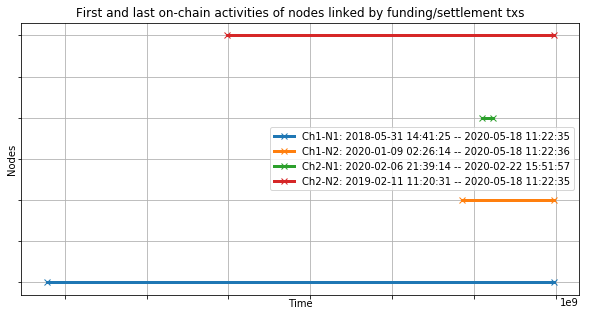

In [149]:
for il in impossible_links:
    plt.figure(figsize=(10,5))
    i = 0
    for node in il[3:][::-1]:
        x = [node_openings_closings[node]['first_activity'], node_openings_closings[node]['last_activity']]
        y = [i, i]
        C = 'Ch1-'
        if i > 1:
            C = 'Ch2-'
        lbl = C + 'N' + str(1 + i%2) + ': ' +  ts2date(x[0]) + ' -- ' + ts2date(x[1])
        plt.plot(x, y, '-x',label=lbl, linewidth=3)
        i += 1
#         print(ts2date(node_openings_closings[node]['first_activity']), '.....', ts2date(node_openings_closings[node]['last_activity']))
    ax = plt.gca()
    plt.xlabel('Time')
    plt.ylabel('Nodes')
    plt.title('First and last on-chain activities of nodes linked by funding/settlement txs')
    ax.tick_params(axis='x',labelbottom='off')
    ax.tick_params(axis='y',labelleft='off')
    plt.legend()
    plt.grid()
    plt.show()
    break

In [150]:
# coinjoin
# '970cdbbbf0a2c2ac2b029a26dde3a815a0045f03e2b56afc4e980a20666191ca' in funding_txs_set # True
# '970cdbbbf0a2c2ac2b029a26dde3a815a0045f03e2b56afc4e980a20666191ca' in [el[2] for el in useful_links] # False

# for a, e in funding_address_entity.items():
#     if e in missing_set:
#         print(a)
        
# 3NNggKQHp56ZqW1owXHqVC7oQ7cnjN8iWu
# 3NXyYAPPfcXGEe8MmqULJqR4TfpQy8Fsqt
# 361GSnsNURUYmmPmHXnGAa9HRzCusdovXh
# 3B3fTXb5QMSn74AU3fBrtAS7AroomzYWh4
# 39CMLdBuez33kuYzkcY6bSLsubrToQeJst
# 3DRnUvkmux5ECy1Yx8ToE5ABWGhBXi9JWb

# missing_tx = '970cdbbbf0a2c2ac2b029a26dde3a815a0045f03e2b56afc4e980a20666191ca' # coinjoin
# for channel in channels.values:
#     funding_tx, out_index = channel[0].split(':')
#     if funding_tx == missing_tx:
#         print(channel)
# ['970cdbbbf0a2c2ac2b029a26dde3a815a0045f03e2b56afc4e980a20666191ca:5'
#  '020a9442b1daee87f771203cf78e1d6c1468f525ecc1a8fde027bd20582b8f6962'
#  '028c1da32603fce64118e469ffe2cfeec04d1c4bd88205efb4e8b4208f77a8064e']

In [151]:
heuristic_1_entity_node = {k: [e for e in v] for k, v in heuristic_1b_entity_node.items()}
heuristic_1_node_entity = {k: [e for e in v] for k, v in heuristic_1b_node_entity.items()}

# write_json(heuristic_1_entity_node, '../data/joined/heuristic_1_entity_node.json')
# write_json(heuristic_1_node_entity, '../data/joined/heuristic_1_node_entity.json')

## Heuristic 2a: ubiquitous node
Here we assume that if a node appears in every channel opened by an entity and it's the only node with this property, then this node is controlled by this entity.

### Confidence levels

In [152]:
funding_entity_possible_nodes = dict()

for channel in channels.values:
    funding_tx, out_index = channel[0].split(':')
    funding_address = funding_txs[funding_tx]['inputs'][0]['address']
    funding_entity = funding_address_entity[funding_address]
    if funding_entity not in funding_entity_possible_nodes:
        funding_entity_possible_nodes[funding_entity] = [] 
    funding_entity_possible_nodes[funding_entity].append(channel[1])
    funding_entity_possible_nodes[funding_entity].append(channel[2])


In [153]:
# each funding entity that has at least n_channels possible nodes (confidence level >= n_channels)
n_channels = 2
entity_channels_half = []
fe_confidence = []
fe_confidence_dict = dict()
for fe, pns in funding_entity_possible_nodes.items():
    if len(pns) >= n_channels*2: # *2 cause we have two nodes per channel
#         print('.........', fe, len(pns), '.........')
        pn_occur = Counter(pns)
        for pn, occur in pn_occur.items():
            if occur*2 == len(pns):
                fe_confidence.append([fe, occur])
                fe_confidence_dict[fe] = occur
                entity_channels_half.append(occur)
#                 print(pn[:10], occur)

In [154]:
entity_channels_half.sort()

In [155]:
print('Highest confidence levels:', entity_channels_half[::-1][:20])

Highest confidence levels: [210, 20, 19, 18, 17, 14, 13, 12, 12, 11, 11, 11, 11, 10, 10, 9, 9, 9, 9, 8]


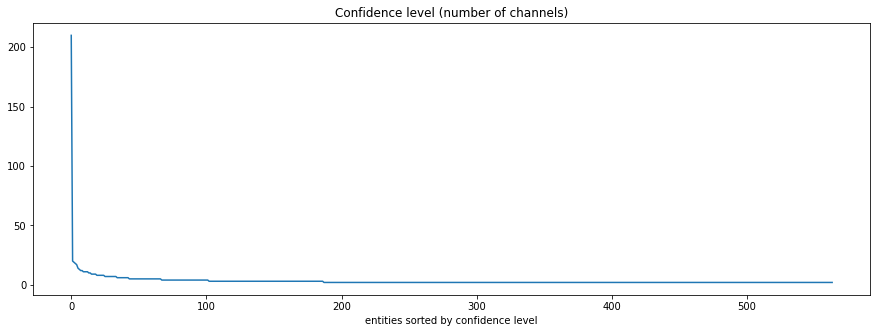

In [156]:
plt.figure(figsize=(15,5))
plt.plot(entity_channels_half[::-1])
plt.title('Confidence level (number of channels)')
plt.xlabel('entities sorted by confidence level')
plt.show()


In [157]:
# # to see intersection between heuristic 1 and 3
# min_conf = 10
# print('Confidence >', min_conf)
# print()
# print('Entity, confidence, intersect')
# for el in fe_confidence:
#     fe, conf = el
#     if conf > min_conf:
#         print(fe, conf, fe in heuristic_1_entity_node)

In [158]:
confidence_linked = dict()
funding_entity_channels_nodes = dict()
node_possible_entities = dict()
# populate funding_entity_channels_nodes
for channel in channels.values:
    funding_tx, out_index = channel[0].split(':')
    funding_address = funding_txs[funding_tx]['inputs'][0]['address']
#     for inpt in funding_txs[funding_tx]['inputs']:
#         funding_addresses2.add(inpt['address'])
    funding_entity = funding_address_entity[funding_address]
    if funding_entity not in funding_entity_channels_nodes:
        funding_entity_channels_nodes[funding_entity] = dict() # use chan_point as key 
    funding_entity_channels_nodes[funding_entity][channel[0]] = [channel[1], channel[2]] # add nodes
    for i in [1, 2]:
        if channel[i] not in node_possible_entities:
            node_possible_entities[channel[i]] = set()
        node_possible_entities[channel[i]].add(funding_entity)

print('Number of funding entities', len(funding_entity_channels_nodes))

heuristic_2a_entity_node_conf = dict()
for min_confidence_level in range(2, 31):
    print(min_confidence_level, end=' ')
    # create link between entity and a node when 
    # the node is the only one present in every channel of the entity
    heuristic_2a_entity_node_conf[min_confidence_level] = dict() # linking
    for fe in funding_entity_channels_nodes:
        node_occur = dict() # count number of occurrences of each node in channels

        # compute node_occur
        for channel in funding_entity_channels_nodes[fe]:
            for node in funding_entity_channels_nodes[fe][channel]:
                if node not in node_occur:
                    node_occur[node] = 0
                node_occur[node] += 1

        # get max_occur
        max_occur = max(node_occur.values())
        selected_node = None

        # check if there is a perfect max_occur, i.e.,
        # if max_occur is unique and in every channel (corresponding node is in every channel)
        if list(node_occur.values()).count(max_occur) == 1 and max_occur == len(funding_entity_channels_nodes[fe]) and max_occur >= min_confidence_level:
            # get node present in every channel and add it to its entity
            selected_node = [n for n, occ in node_occur.items() if occ == max_occur][0]
            if fe not in heuristic_2a_entity_node_conf[min_confidence_level]:
                heuristic_2a_entity_node_conf[min_confidence_level][fe] = set()
            heuristic_2a_entity_node_conf[min_confidence_level][fe].add(selected_node) # it should be unique, but let's see
#     print('Minimum confidence level:', min_confidence_level)
#     print('Number of entities linked:', len(heuristic_2a_entity_node_conf[min_confidence_level]))
#     print()
    confidence_linked[min_confidence_level] = len(heuristic_2a_entity_node_conf[min_confidence_level])

Number of funding entities 69495
2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 

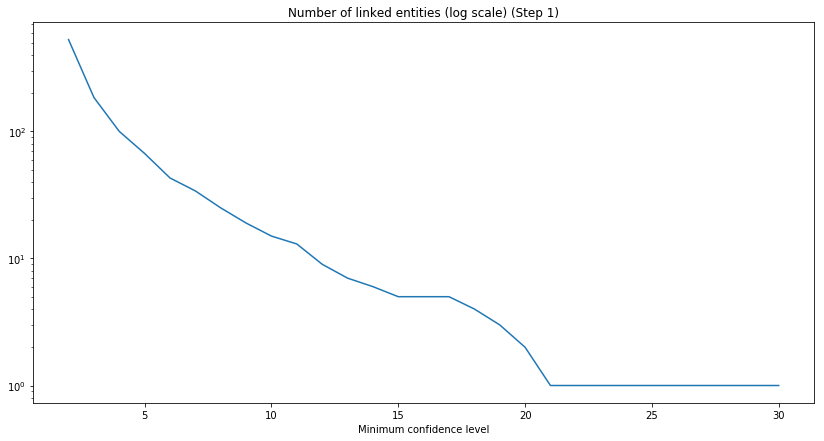

In [159]:
plt.figure(figsize=(14,7))
plt.semilogy(confidence_linked.keys(), confidence_linked.values())
plt.title('Number of linked entities (log scale) (Step 1)')
plt.xlabel('Minimum confidence level')
plt.show()


In [160]:
# # check if entity mapping is unique
# entities_with_multiple_nodes = 0
# for fe, sn in heuristic_2a_entity_node.items():
#     if len(sn) != 1:
#         entities_with_multiple_nodes += 1
# #         print(fe, len(sn))
# print('Entities with multiple nodes:', entities_with_multiple_nodes)

# heuristic_3_node_entity = dict()
# for e, ns in heuristic_3_entity_node.items():
#     for n in ns:
#         if n not in heuristic_3_node_entity:
#             heuristic_3_node_entity[n] = set()
#         heuristic_3_node_entity[n].add(e)    

# max_entities_per_node = 0
# for n, e in heuristic_3_node_entity.items():
#     if len(e) != 1:
#         if len(e) > max_entities_per_node:
#             max_entities_per_node = len(e)
#             node_with_max_entities = n
#         nodes_with_multiple_entities += 1
# #         print(len(e))
# print('Number of nodes linked to multiple entities:', nodes_with_multiple_entities)
# print('Max number of entities linked to a node:', max_entities_per_node)
# if node_with_max_entities in node_alias:
#     print('Alias of node with max number of entities:', node_alias[node_with_max_entities])

In [161]:
# for fe, sn in entity_selected_nodes.items():
#     entity_selected_nodes[fe] = list(sn)
# write_json(entity_selected_nodes, '../data/joined/entity_selected_nodes.json')

In [162]:
# print('Entities in common, confidence')
# for e in set(heuristic_3_entity_node.keys()).intersection(set(heuristic_2_entity_node.keys())):
#     print(e, fe_confidence_dict[e])

In [163]:
### Do the two heuristics yield the same entity-node link?
# entities_heuristics_2_3 = set(heuristic_3_entity_node.keys()).intersection(set(heuristic_2_entity_node.keys()))
# # to see if the two heuristics say the same
# same = 0
# for e in entities_heuristics_2_3:
#     if heuristic_2_entity_node[e] == heuristic_3_entity_node[e]:
#         same += 1
# print(same, 'matching links out of', len(entities_heuristics_2_3), 'entities in common')

## Heuristic 2b: same as heuristic 1b

If a funding entity is using the same address in the settlement tx and this entity is linked to a node in the channel, then the other entity receiving the funds must control the other node in the channel.

In [164]:
heuristic_2b_entity_node_conf = dict()
for conf in heuristic_2a_entity_node_conf:
    heuristic_2b_entity_node_conf[conf] = {k:v for k,v in heuristic_2a_entity_node_conf[conf].items()}

In [165]:
for conf in heuristic_2b_entity_node_conf:
    print()
    print('='*5, conf, '='*5)
    found = True # at least one new link
    i = 0
    while found:
        i += 1
        found = False # until we find a new link
        print('Iteration:', i, '-- Number of linked entities', len(heuristic_2b_entity_node_conf[conf]))
        for channel in channels.values:
            funding_tx, out_index = channel[0].split(':')
            node_1 = channel[1]
            node_2 = channel[2]
            funded_address = funding_txs[funding_tx]['outputs'][int(out_index)]['address']

            settlement_txs = funded_address_settlement_txs[funded_address]
            # if channel is closed and number of outputs == 2 and one node is mapped to one entity in the outputs
            if settlement_txs: # it is always only one
                for settlement_tx in settlement_txs:
                    # count entities
                    entities = list(set([settlement_address_entity[out['address']] for out in settlement_tx['outputs']]))
                    if len(entities) == 2:
                        entity_1 = entities[0]
                        entity_2 = entities[1]
                        # if entity_1 is linked to one node in the channel, link the other node to the other entity
                        if entity_1 in heuristic_2b_entity_node_conf[conf]:
                            # entity_1 has a node, now find if it is in this channel
                            if node_1 in heuristic_2b_entity_node_conf[conf][entity_1]:
                                heuristic_2b_entity_node_conf[conf], found = add_node_to_entity(entity_2, node_2, heuristic_2b_entity_node_conf[conf], found)

                            elif node_2 in heuristic_2b_entity_node_conf[conf][entity_1]:
                                heuristic_2b_entity_node_conf[conf], found = add_node_to_entity(entity_2, node_1, heuristic_2b_entity_node_conf[conf], found)

                        # if entity_2 is linked to one node in the channel, link the other node to the other entity
                        if entity_2 in heuristic_2b_entity_node_conf[conf]:
                            if node_1 in heuristic_2b_entity_node_conf[conf][entity_2]:
                                heuristic_2b_entity_node_conf[conf], found = add_node_to_entity(entity_1, node_2, heuristic_2b_entity_node_conf[conf], found)

                            elif node_2 in heuristic_2b_entity_node_conf[conf][entity_2]:
                                heuristic_2b_entity_node_conf[conf], found = add_node_to_entity(entity_1, node_1, heuristic_2b_entity_node_conf[conf], found)

    print('Final number of linked entities', (len(heuristic_2b_entity_node_conf[conf])))


===== 2 =====
Iteration: 1 -- Number of linked entities 528
Iteration: 2 -- Number of linked entities 2079
Iteration: 3 -- Number of linked entities 3905
Iteration: 4 -- Number of linked entities 4548
Iteration: 5 -- Number of linked entities 4707
Iteration: 6 -- Number of linked entities 4739
Iteration: 7 -- Number of linked entities 4747
Final number of linked entities 4747

===== 3 =====
Iteration: 1 -- Number of linked entities 185
Iteration: 2 -- Number of linked entities 1678
Iteration: 3 -- Number of linked entities 3493
Iteration: 4 -- Number of linked entities 4169
Iteration: 5 -- Number of linked entities 4347
Iteration: 6 -- Number of linked entities 4386
Iteration: 7 -- Number of linked entities 4394
Final number of linked entities 4394

===== 4 =====
Iteration: 1 -- Number of linked entities 100
Iteration: 2 -- Number of linked entities 1376
Iteration: 3 -- Number of linked entities 3306
Iteration: 4 -- Number of linked entities 4055
Iteration: 5 -- Number of linked entit

Iteration: 6 -- Number of linked entities 4191
Iteration: 7 -- Number of linked entities 4206
Final number of linked entities 4206

===== 24 =====
Iteration: 1 -- Number of linked entities 1
Iteration: 2 -- Number of linked entities 1193
Iteration: 3 -- Number of linked entities 3118
Iteration: 4 -- Number of linked entities 3932
Iteration: 5 -- Number of linked entities 4142
Iteration: 6 -- Number of linked entities 4191
Iteration: 7 -- Number of linked entities 4206
Final number of linked entities 4206

===== 25 =====
Iteration: 1 -- Number of linked entities 1
Iteration: 2 -- Number of linked entities 1193
Iteration: 3 -- Number of linked entities 3118
Iteration: 4 -- Number of linked entities 3932
Iteration: 5 -- Number of linked entities 4142
Iteration: 6 -- Number of linked entities 4191
Iteration: 7 -- Number of linked entities 4206
Final number of linked entities 4206

===== 26 =====
Iteration: 1 -- Number of linked entities 1
Iteration: 2 -- Number of linked entities 1193
Iter

In [166]:
print('Number of total entities (funding + settlement):', len(set(funding_address_entity.values()).union(set(settlement_address_entity.values()))))

Number of total entities (funding + settlement): 92544


In [167]:
conf = 2
entities_heuristics_1_2 = set(heuristic_1b_entity_node.keys()).intersection(set(heuristic_2b_entity_node_conf[conf].keys()))
# to see if the two heuristics say the same
same = 0
for e in entities_heuristics_1_2:
    if heuristic_1b_entity_node[e] == heuristic_2b_entity_node_conf[conf][e]:
        same += 1
print(same, 'matching links out of', len(entities_heuristics_1_2), 'entities in common')

4218 matching links out of 4218 entities in common


In [168]:
heuristic_2b_node_entity_conf = dict()
for conf in heuristic_2b_entity_node_conf:
    heuristic_2b_node_entity_conf[conf] = dict()
    for e, ns in heuristic_2b_entity_node_conf[conf].items():
        for n in ns:
            if n not in heuristic_2b_node_entity_conf[conf]:
                heuristic_2b_node_entity_conf[conf][n] = set()
            heuristic_2b_node_entity_conf[conf][n].add(e)    

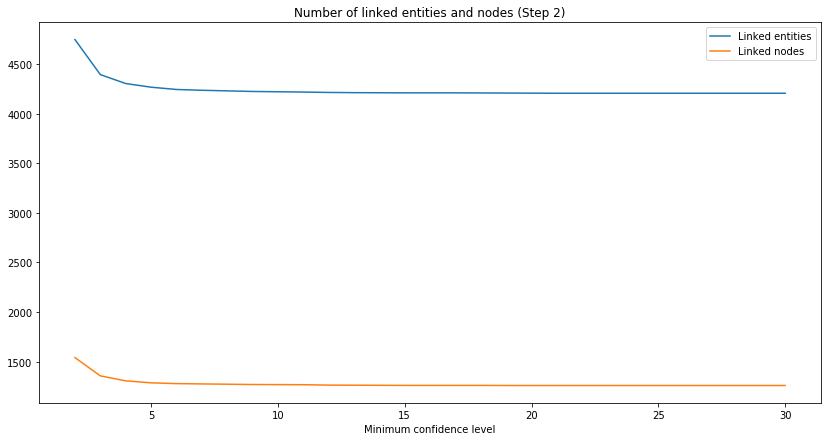

In [169]:
plt.figure(figsize=(14,7))
plt.plot(heuristic_2b_entity_node_conf.keys(), [len(les) for les in heuristic_2b_entity_node_conf.values()], label='Linked entities')
plt.plot(heuristic_2b_node_entity_conf.keys(), [len(lns) for lns in heuristic_2b_node_entity_conf.values()], label='Linked nodes')
plt.title('Number of linked entities and nodes (Step 2)')
plt.legend()
plt.xlabel('Minimum confidence level')
plt.show()

In [170]:
# check if entity mapping is unique
for conf in heuristic_2b_entity_node_conf:
    entities_with_multiple_nodes = 0
    for fe, sn in heuristic_2b_entity_node_conf[conf].items():
        if len(sn) != 1:
            entities_with_multiple_nodes += 1
    #         print(fe, len(sn)) # 585475938 3
    print('Confidence level:', conf, 'Entities with multiple nodes:', entities_with_multiple_nodes)

Confidence level: 2 Entities with multiple nodes: 1
Confidence level: 3 Entities with multiple nodes: 1
Confidence level: 4 Entities with multiple nodes: 1
Confidence level: 5 Entities with multiple nodes: 1
Confidence level: 6 Entities with multiple nodes: 1
Confidence level: 7 Entities with multiple nodes: 1
Confidence level: 8 Entities with multiple nodes: 1
Confidence level: 9 Entities with multiple nodes: 1
Confidence level: 10 Entities with multiple nodes: 1
Confidence level: 11 Entities with multiple nodes: 1
Confidence level: 12 Entities with multiple nodes: 1
Confidence level: 13 Entities with multiple nodes: 1
Confidence level: 14 Entities with multiple nodes: 1
Confidence level: 15 Entities with multiple nodes: 1
Confidence level: 16 Entities with multiple nodes: 1
Confidence level: 17 Entities with multiple nodes: 1
Confidence level: 18 Entities with multiple nodes: 1
Confidence level: 19 Entities with multiple nodes: 1
Confidence level: 20 Entities with multiple nodes: 1
C

In [171]:
max_entities_per_node = 0
conf = 2
for n, e in heuristic_2b_node_entity_conf[conf].items():
    if len(e) != 1:
        if len(e) > max_entities_per_node:
            max_entities_per_node = len(e)
            node_with_max_entities = n
        nodes_with_multiple_entities += 1
#         print(len(e))
print('Confidence level:', 2)
print('Number of nodes linked to multiple entities:', nodes_with_multiple_entities)
print('Max number of entities linked to a node:', max_entities_per_node)
if node_with_max_entities in node_alias:
    print('Alias of node with max number of entities:', node_alias[node_with_max_entities])

Confidence level: 2
Number of nodes linked to multiple entities: 1063
Max number of entities linked to a node: 120
Alias of node with max number of entities: {'ACINQ'}


In [172]:
node_n_entities_list = []
conf = 2
for n, e in heuristic_2b_node_entity_conf[conf].items():
    node_n_entities_list.append([n, len(e)])
node_n_entities_list.sort(key=lambda x: -x[1])
N = 10
print('Confidence level', conf)
print('Top', N, 'nodes and sorted by of entities')
node_n_entities_list[:10]

Confidence level 2
Top 10 nodes and sorted by of entities


[['03864ef025fde8fb587d989186ce6a4a186895ee44a926bfc370e2c366597a3f8f', 120],
 ['0331f80652fb840239df8dc99205792bba2e559a05469915804c08420230e23c7c', 92],
 ['02ad6fb8d693dc1e4569bcedefadf5f72a931ae027dc0f0c544b34c1c6f3b9a02b', 89],
 ['03c2abfa93eacec04721c019644584424aab2ba4dff3ac9bdab4e9c97007491dda', 70],
 ['03bb88ccc444534da7b5b64b4f7b15e1eccb18e102db0e400d4b9cfe93763aa26d', 68],
 ['030c3f19d742ca294a55c00376b3b355c3c90d61c6b6b39554dbc7ac19b141c14f', 48],
 ['03d06758583bb5154774a6eb221b1276c9e82d65bbaceca806d90e20c108f4b1c7', 48],
 ['02004c625d622245606a1ea2c1c69cfb4516b703b47945a3647713c05fe4aaeb1c', 45],
 ['02529db69fd2ebd3126fb66fafa234fc3544477a23d509fe93ed229bb0e92e4fb8', 45],
 ['0279c22ed7a068d10dc1a38ae66d2d6461e269226c60258c021b1ddcdfe4b00bc4', 43]]

In [173]:
heuristic_2_entity_node_conf = {conf: {k: [e for e in v] for k, v in heuristic_2b_entity_node_conf[conf].items()} for conf in heuristic_2b_entity_node_conf}
heuristic_2_node_entity_conf = {conf: {k: [e for e in v] for k, v in heuristic_2b_node_entity_conf[conf].items()} for conf in heuristic_2b_node_entity_conf}

In [174]:
# write_json(heuristic_2_entity_node_conf, '../data/joined/heuristic_2_entity_node_conf.json')
# write_json(heuristic_2_node_entity_conf, '../data/joined/heuristic_2_node_entity_conf.json')

In [175]:
C = '{:,}'.format(len(channels)) 

In [421]:
n_addresses = len(set(funding_address_entity.keys()).union(set(settlement_address_entity.keys())))
n_addresses

156174

In [426]:
len(funding_txs.keys())

70782

In [425]:
len(settlement_txs_hashes)

33503

In [429]:
n_txs_funding_settling = len(set(funding_txs.keys())) + len(set(settlement_txs_hashes))
n_txs_funding_settling

104285

In [176]:
C = '{:,}'.format(len(channels))
C_o = '{:,}'.format(open_channels)
N_1 = '{:,}'.format(len(node_channels))
T_i = min([funding_txs[t]['timestamp'] for t in funding_txs]) # 1515732563
T_f = max([funding_txs[t]['timestamp'] for t in funding_txs]) # 1582523863
E_f = '{:,}'.format(len(funding_entity_channels_nodes))
E_s = '{:,}'.format(len(set([e for e in settlement_address_entity.values()])))
E = '{:,}'.format(len(set([e for e in settlement_address_entity.values()]).union(set([e for e in funding_address_entity.values()]))))
data_in = [C, C_o, N_1, ts2date(T_i)[:10], ts2date(T_f)[:10], E_f, E_s, E]
data_in

['70,783',
 '37,280',
 '8,267',
 '2018-01-12',
 '2020-02-24',
 '69,495',
 '28,106',
 '92,544']

In [177]:
data_in_df = pd.DataFrame([data_in], columns=['C', 'C_o', 'N_1', 'T_i', 'T_f', 'E_f', 'E_s', 'E'])

In [178]:
data_in_df.to_latex('data_in_stats.tex', index=False)

## Union of both heuristics

In [179]:
heuristic_1_2_entity_node = dict()
for e, ns in heuristic_1b_entity_node.items():
    if e not in heuristic_1_2_entity_node:
        heuristic_1_2_entity_node[e] = set()
    heuristic_1_2_entity_node[e] = heuristic_1_2_entity_node[e].union(ns)
    
for e, ns in heuristic_2b_entity_node_conf[2].items():
    if e not in heuristic_1_2_entity_node:
        heuristic_1_2_entity_node[e] = set()
    heuristic_1_2_entity_node[e] = heuristic_1_2_entity_node[e].union(ns)

In [180]:
len(heuristic_1_2_entity_node)

4747

In [181]:
len(set(heuristic_2b_entity_node_conf[2].keys()).intersection(set(heuristic_1b_entity_node.keys())))

4218

In [182]:
len(set(heuristic_1b_entity_node.keys()))

4218

In [183]:
len(heuristic_2b_entity_node_conf[2].keys())

4747

In [184]:
# for node in node_openings_closings:
#     print(node, node_openings_closings[node]['first_activity'], node_openings_closings[node]['last_activity'])

## Alias clustering
Clustering of LN nodes using alias, AS and IP addresses.

If nodes are clustered together using alias/AS/IP, then we can say that they are controlled by the same real-world entity, this means that the Bitcoin entities related to a set of nodes in a cluster are also related, this could reduce the decentralization of the LN.

In [192]:
alias_clusters_df = pd.read_csv('../data/joined/results/alias_address_clusters.csv')

In [208]:
alias_cluster_nodes = set()
cluster_node = dict()
for e in alias_clusters_df.values:
    cluster, node = e[0], e[1]
    alias_cluster_nodes.add(node)
    if cluster not in cluster_node:
        cluster_node[cluster] = set()
    cluster_node[cluster].add(node)
alias_cluster_nodes_intersection = alias_cluster_nodes.intersection(set(heuristic_1_node_entity.keys()))

In [209]:
len(alias_cluster_nodes_intersection)

168

In [ ]:
# how can we get closer to the correct number of real-world entities?
# clustering together bitcoin entities (usign co-spend and channel heuristics)
# clustering together LN nodes using alias/AS/AP
# merging the results

# initially we have N_e1 bitcoin entities
# we merge them using channel heuristic 1 and obtain N_e2

In [211]:
len(heuristic_1_node_entity)

1265

In [219]:
seen_entities = set()
N_e2 = 0
seen_nodes = set()
for n, es in heuristic_1_node_entity.items():
    for e in es:
        if e not in seen_entities:
            seen_entities.add(e)
            if n not in seen_nodes:
                seen_nodes.add(n)
                N_e2 += 1
print('Number of (close-to-real-world) entities we get combining Friedhelm and Matteo\'s heuristics:', N_e2, 'out of', len(heuristic_1_node_entity), 'LN nodes and ', len(heuristic_1_entity_node), 'bitcoin entities')

Number of (close-to-real-world) entities we get combining Friedhelm and Matteo's heuristics: 1263 out of 1265 LN nodes and  4218 bitcoin entities


In [447]:
seen_entities = set()
N_e2 = 0
seen_nodes = set()
for n, es in heuristic_2_node_entity_conf['2'].items():
    for e in es:
        if e not in seen_entities:
            seen_entities.add(e)
            if n not in seen_nodes:
                seen_nodes.add(n)
                N_e2 += 1
print('Number of (close-to-real-world) entities we get combining Friedhelm and Matteo\'s heuristics:', N_e2, 'out of', len(heuristic_1_node_entity), 'LN nodes and ', len(heuristic_1_entity_node), 'bitcoin entities')

Number of (close-to-real-world) entities we get combining Friedhelm and Matteo's heuristics: 2033 out of 1265 LN nodes and  4218 bitcoin entities


In [451]:
for e, ns in heuristic_2_entity_node_conf['2'].items():
    if len(ns) > 2:
        print(e, end=' ')

585475938 

In [459]:
for n in heuristic_1_entity_node[585475938]:
    print(n)
    if n in node_alias:
        print(n, node_alias[n])
    if n in node_ip:
        print(n, node_ip[n])

02d3b4da689caaed39d293a41d1bacd5061355b4225c1eaa2d4460fd27439aaa36
037ad988bfeca5885b3eab0abb9db4658bb31a6510a03b9181a754e480fc558338
0229cf81c21bbd21c2a41a4ae645933b89bb6d9a5920ca90e41ba270666879adab
0229cf81c21bbd21c2a41a4ae645933b89bb6d9a5920ca90e41ba270666879adab {'BOOYAH'}


In [460]:
# how can many nodes be linked to the same entity?
node_channels[n]

{'2346f6afe058beb5d5ea66ec15581b9b8dcbf42fd2045922d97851afc58e70bd:1',
 '6140d3cdd57cd880b7b0b65447dec43b4fa1c46f5a77abea74b7220346d8a87b:1',
 '90aa962cc8484382eee28acb359c9858070059e295e1118e867743437a56501c:0',
 'e3ec0bf86841ec516995a60d5ec640516a1bdd0baef01da21222a9fcdf2c8d4c:0',
 'fcdb6342124154b9df695c637e962a7c7a991e17ad32632585b368cdb18bf086:1'}

In [527]:
# find which channels are related to 585475938
multinode_e = 585475938
for channel in channels.values:
    chan_point, n1, n2 = channel
    funding_tx, out_index = chan_point.split(':')
    funded_address = funding_txs[funding_tx]['outputs'][int(out_index)]['address']
    stx = funded_address_settlement_txs[funded_address]
    if stx:
        for i in stx[0]['outputs']:
            if i['address'] in multinode_addresses:# and str(multinode_e) == str(settlement_address_entity[i['address']]):
                print()
                print('funding entity--------')
                print(funding_address_entity[funding_txs[funding_tx]['inputs'][0]['address']])
#                 print('channel-----------')
#                 print(channel)
                print('n1--------------')
                print(n1, heuristic_2_node_entity_conf['2'][n1])
                print('n2--------------')
                print(n2, heuristic_2_node_entity_conf['2'][n2])
#                 print('funded address------------')
#                 print(funded_address)
                print('settlement entities-------------------')
                for out in stx[0]['outputs']:
                    print(settlement_address_entity[out['address']])


funding entity--------
581251394
n1--------------
022755c3ff4e5a1d71f573cda4b315887fc00a9e5c9ea9a847d939f3e517e69a70 [610379778, 573408904, 586941580, 523820311, -15193, -15832, -11606, 525958189, -13906, 561522608, 602537265, 549230387, 589369780, 599246775, 520456956, 584944709, -15160, -12344, -15030, 598239305, 612442952, 547054542, -16172, 488461910, 582571740, 585475939, 570305639, -16151, 555401844, 595246074, 540820988]
n2--------------
037ad988bfeca5885b3eab0abb9db4658bb31a6510a03b9181a754e480fc558338 [585475938]
settlement entities-------------------
585475938
584944709

funding entity--------
578384702
n1--------------
0229cf81c21bbd21c2a41a4ae645933b89bb6d9a5920ca90e41ba270666879adab [585475938]
n2--------------
034ea80f8b148c750463546bd999bf7321a0e6dfc60aaf84bd0400a2e8d376c0d5 [-16509, -16121, -15991, 542680845, 610379792, -15852, -15967, 534245690, -15814, -15813, -16196, 540820157, -16191, -5817, -16183, -16566, 594418125, -16050, 589788241, -15913, 549230425, -16166, 5

In [529]:
# 022755c3ff4e5a1d71f573cda4b315887fc00a9e5c9ea9a847d939f3e517e69a70
# 037ad988bfeca5885b3eab0abb9db4658bb31a6510a03b9181a754e480fc558338 585475938
# 
# 0229cf81c21bbd21c2a41a4ae645933b89bb6d9a5920ca90e41ba270666879adab 585475938
# 034ea80f8b148c750463546bd999bf7321a0e6dfc60aaf84bd0400a2e8d376c0d5
# 
# 0229cf81c21bbd21c2a41a4ae645933b89bb6d9a5920ca90e41ba270666879adab 585475938
# 03d37fca0656558de4fd86bbe490a38d84a46228e7ec1361801f54f9437a18d618
# 
# 022755c3ff4e5a1d71f573cda4b315887fc00a9e5c9ea9a847d939f3e517e69a70
# 02d3b4da689caaed39d293a41d1bacd5061355b4225c1eaa2d4460fd27439aaa36 585475938
# 
# 0229cf81c21bbd21c2a41a4ae645933b89bb6d9a5920ca90e41ba270666879adab 585475938
# 03fce165537aea120bffe8505876b44d5119354f825b3eac329b761fc5636bf334
# 
# 028a8e53d70bc0eb7b5660943582f10b7fd6c727a78ad819ba8d45d6a638432c49
# 037ad988bfeca5885b3eab0abb9db4658bb31a6510a03b9181a754e480fc558338 585475938

In [ ]:
# a linked entity settles a channel with 585475938 which is then linked to the other node
# 585475938 is used to settle different channels from different channels

In [466]:
# entity is 585475938
# nodes are
# 02d3b4da689caaed39d293a41d1bacd5061355b4225c1eaa2d4460fd27439aaa36
# 037ad988bfeca5885b3eab0abb9db4658bb31a6510a03b9181a754e480fc558338
# 0229cf81c21bbd21c2a41a4ae645933b89bb6d9a5920ca90e41ba270666879adab
585475938 in settlement_entities

True

In [501]:
multinode_addresses = settlement_entity_addresses[multinode_e]

In [503]:
multinode_addresses[0] in settlement_addresses

True

In [474]:
funding_txs[funding_tx]

{'tx_hash': '000086d9c667afcaee614ccf39e820ec44229602fae7beeeda65bed915b09287',
 'coinbase': False,
 'height': 610375,
 'inputs': [{'address': 'bc1q27p88fsqn3wunjnspxpmgamzy88fwr2h4ztcms',
   'value': {'eur': 2.85, 'value': 43130, 'usd': 3.19}},
  {'address': 'bc1qfwryeqdmcdjltpht4s33rj7cpzwku4jg0nwrxk',
   'value': {'eur': 25.24, 'value': 381513, 'usd': 28.22}}],
 'outputs': [{'address': 'bc1qez2r5zp6wgkudyexd9dq4ssa8nze0hmafd2fux',
   'value': {'eur': 1.62, 'value': 24420, 'usd': 1.81}},
  {'address': 'bc1q5feeqqrnf4hlddpu87yf24lf4z7nwz77pygfywr7wtd75u2ys29qnk8s7f',
   'value': {'eur': 26.47, 'value': 400000, 'usd': 29.59}}],
 'timestamp': 1577661560,
 'total_input': {'eur': 28.1, 'value': 424643, 'usd': 31.41},
 'total_output': {'eur': 28.08, 'value': 424420, 'usd': 31.4}}

In [454]:
heuristic_2_entity_node_conf['2']['585475938']

['0229cf81c21bbd21c2a41a4ae645933b89bb6d9a5920ca90e41ba270666879adab',
 '02d3b4da689caaed39d293a41d1bacd5061355b4225c1eaa2d4460fd27439aaa36',
 '037ad988bfeca5885b3eab0abb9db4658bb31a6510a03b9181a754e480fc558338']

In [210]:
# list node and number of entities associated
for n in alias_cluster_nodes_intersection:
    print(n, len(heuristic_1_node_entity[n]))

02e7d62870509b6dcf3980509d1d0d59c56509508c47a88dfa3d6f01dd5e312639 1
02ae1cbbd484a2bf7384611addab02dcf1997c4ac88d289b6953b54148b1fdb188 3
02c91d6aa51aa940608b497b6beebcb1aec05be3c47704b682b3889424679ca490 24
0283065d6d5b1fbeaa1f21e62755b4b834c4fabd2765d9522f5a79ec216fec3013 1
03be5c53f444e4aae7276c7bf47a9d54738894825e7ac0ce51caa73a9efe5d7b13 1
027e70d8859e090ed975b11cfa02109221482954a254dff185e4142188eb66518b 2
02911515d46e371eacb87dbd5f513b03ab23031d17c3668293a8cca5369072dbea 2
03ecb269628f27be3f8b032ae5a7480df8a7e943997bda0752632c05744d06bd77 1
032ebdae3314f072acd70e66e18572e6ba27f96918009369585e7cdcf36af3cf9e 2
03b3cdfbe44de70253b2d3719683632b74564da8be48415618d86328988ae9eb74 1
02ede2c27062cc2b0a04aa49fb456fba071bb160b24e54d3e1252b8404db2a298a 1
0374ecf61ed6c1208c42339f47decde2bc0c4393ac95f07827b3471e939d7eb961 4
033e9ce4e8f0e68f7db49ffb6b9eecc10605f3f3fcb3c630545887749ab515b9c7 24
0311cad0edf4ac67298805cf4407d94358ca60cd44f2e360856f3b1c088bcd4782 16
0356c02ffe265f8ff38471e90178552

In [539]:
# I want to see if there is linked nodes have aliases if are in alias clusters
# start from an alias cluster
# check if the nodes are mapped to any entity    

In [543]:
manual_checks = pd.read_csv(level2_folder + 'manualcheck.csv')
heuristic_2_entity_node_conf = read_json(results_folder + 'heuristic_2_entity_node_conf_snakes.json')
heuristic_2_node_entity_conf = read_json(results_folder + 'heuristic_2_node_entity_conf_snakes.json')
alias_cluster_heur2_intersection =  set(manual_checks.loc[manual_checks.manualAssessment == 'ok'].pub_key.values).intersection(set(heuristic_2_node_entity_conf['2']))

In [559]:
alias_clusters_df

,cluster,pub_key,cluster_origin,alias
0,0,032ebdae3314f072acd70e66e18572e6ba27f969180093...,alias/asn & address,Joltfun.com Game Shop (CLN2) | Joltfun.com Gam...
1,0,0374ecf61ed6c1208c42339f47decde2bc0c4393ac95f0...,alias/asn & address,Joltfun.com Game Shop (LND) | Joltfun.com Game...
2,1,0216006237022044d9bdb73ca51af267c5f67cf76095b4...,alias/asn & address,BOSTON_ROUTE11-103-001
3,1,02d7ca7aae77a43a65a50cbf806cf7b43af2f89c1cf331...,alias/asn & address,BOSTON_ROUTE11-103-002
4,2,02689ecaec3a14476f454e03cff1a4b4ff367f9eadb4d7...,alias/asn,IMAGINE_PEACE
5,2,031b3971363f95a2c645c96da138f9eec0a82ec41108d8...,alias/asn,IMAGINE_PEACE
6,3,021fd1af51144a63b590306edfa855cbc4f8587e689c6c...,alias/asn,the-cake-is-a-lie-2
7,3,02e2852302c048cf310afeed1a2b340fb6a623454a8604...,alias/asn,the-cake-is-a-lie
8,4,02311c86867d6d148baf454260c7a9d0016d3f7da64e48...,alias/asn & address,xuange [bitclouds.sh]
9,4,0250e86fdaaefd59ea7481c53ee6d7e1b01e2bfd582fdd...,address,phecda-325 [bitclouds.sh]


In [556]:
node_alias_cluster = dict()
for e in manual_checks.loc[manual_checks.manualAssessment == 'ok'].values:
    node_alias_cluster[e[1]] = [e[3], e[0]]

In [614]:
funding_entity_addresses[snake]

['bc1qm344fymdx9zmt0kywfu528dkwlz68yk5xhmr0k',
 'bc1qgnlmj39h582mfguawdes9wfqwp0pzlu0dl5rmq',
 'bc1qfnrf6k59yzz5axlktdw9try6z6h5sgxqrzytge',
 'bc1qee64268u7vz2zul6sz7v5anjdfrj3z9gnc72sm',
 'bc1qhevuzcgg9dr6t55g2ty5sls78j49wzw3sm7cg5']

In [557]:
print('cluster, #entities, alias')
for n in alias_cluster_heur2_intersection:
    print(node_alias_cluster[n][1], len(heuristic_2_node_entity_conf['2'][n]), node_alias[n])

cluster, #entities, alias
17 18 {'LNBIG.com [lnd-41]'}
61 1 {'Buda.com [Mainnet]|Buda.com'}
150 2 {'CryptoCloaksBlitz'}
40 48 {'Bitrefill.com/gift-cards|Bitrefill.com'}
17 31 {'LNBIG.com [lnd-07]'}
15 3 {'SwissNode-Bank (swissnode.io)'}
1 2 {'BOSTON_ROUTE11-103-002'}
17 28 {'LNBIG.com [lnd-31]'}
17 44 {'LNBIG.com [lnd-10]'}
17 24 {'LNBIG.com [lnd-37]'}
17 32 {'LNBIG.com [lnd-21]'}
17 43 {'LNBIG.com [lnd-02]'}
17 25 {'LNBIG.com [lnd-28/old-lnd-22]|LNBIG.com [lnd-28]|LNBIG.com [lnd-22]'}
17 36 {'LNBIG.com [lnd-17]'}
1 2 {'BOSTON_ROUTE11-103-001'}
17 31 {'LNBIG.com [lnd-34]'}
12 7 {'fairly.cheap'}
17 35 {'LNBIG.com [lnd-26]'}
203 2 {'knudix-mini'}
0 2 {'Joltfun.com Game Shop (CLN2)|Joltfun.com GameStore (C-LN 2)'}
17 26 {'LNBIG.com [lnd-12]'}
17 33 {'LNBIG.com [lnd-06]'}
17 33 {'LNBIG.com [lnd-27/old-lnd-19]|LNBIG.com [lnd-19]|LNBIG.com [lnd-27]'}
0 4 {'Joltfun.com Game Shop (LND)|Joltfun.com GameStore (LND)'}
223 1 {'ShockWallet.app'}
17 25 {'LNBIG.com [lnd-38]'}
17 44 {'LNBIG.com [lnd-1

In [611]:
print('node,alias,entity')
for node, es in heuristic_2_node_entity_conf['2'].items():
# for node, es in heuristic_1_node_entity.items():
    if node in node_alias:
        a = list(node_alias[node])[0]
        if 'gar-nodl-it' in a:
            print(node[:5] + '...,' +  a + ',' +  str(es[0]))


node,alias,entity
02771...,012-lnd-gar-nodl-it,569097757
03369...,011-lnd-gar-nodl-it,569097754
02352...,010-lnd-gar-nodl-it,568840303
03624...,013-lnd-gar-nodl-it,569097755
031ec...,006-lnd-gar-nodl-it,568840299
03bf7...,hub19-lnd-gar-nodl-it,-24016
03820...,015-lnd-gar-nodl-it,569097758
03456...,014-lnd-gar-nodl-it,569097756
02943...,008-lnd-gar-nodl-it,568840301
03eae...,007-lnd-gar-nodl-it,568840302
03b7e...,009-lnd-gar-nodl-it,568840300


In [608]:
print('alias,entity')
for node, es in heuristic_2_node_entity_conf['2'].items():
# for node, es in heuristic_1_node_entity.items():
    if node in node_alias:
        a = list(node_alias[node])[0]
        if 'gar-nodl-it' in a:
            print(node, a + ',' +  str(es[0]))
            if es[0] in fe_confidence_dict:
                print(fe_confidence_dict[es[0]])

alias,entity
02771ad6626d372815607dd6a0e271f70e390be4d17010ac62ed249c4383a410b5 012-lnd-gar-nodl-it,569097757
11
03369c3cddc1e26b8bbd1930b77797e2953336f40b029677b7558edca38ee48211 011-lnd-gar-nodl-it,569097754
10
02352d09be2b7f9ec85b636ab9c415c10e8c58b633e3913e5cd925dfc4f7ce82aa 010-lnd-gar-nodl-it,568840303
9
0362475f2ecf2f4cd9deb1bd6f0474ac7b133b7baebce8cc7354239b329e75f26d 013-lnd-gar-nodl-it,569097755
7
031ec92368cc9ae9dd1e204c57313aa7c30aa079b195e94933c418e503bfabbe8d 006-lnd-gar-nodl-it,568840299
5
03bf7441842433a304a1027abfb75f399cfcf62f75339f15b6c27c24d69100ee50 hub19-lnd-gar-nodl-it,-24016
03820d1537d31b122f3782048635603e1973d94f8f6536ddb3a6c2f666a5315512 015-lnd-gar-nodl-it,569097758
14
03456853c17774d597493875deebf8b7b6a781ca7a0d0b83bfaf862070f1ba7322 014-lnd-gar-nodl-it,569097756
13
02943f9a65dd9a1f9c62d4d9448500ac105e5d5c11f6324575c5e5de8fc3cec4a0 008-lnd-gar-nodl-it,568840301
7
03eae7faa784d5a453f0daf5163ca6af2e69143226b71745f1c065761d3cf01b4f 007-lnd-gar-nodl-it,56884030

In [612]:
for a, es in settlement_address_entity.items():
    if es == -24016:
        print(a)

In [574]:
snake = -24016
type(snake)

int

In [576]:
snake in funding_entity_addresses

False

In [538]:
len(set(heuristic_2_node_entity_conf['2'].keys()).intersection(set(node_alias.keys())))

1961

In [530]:
manual_checks

,cluster,pub_key,cluster_origin,alias,manualAssessment
0,0,032ebdae3314f072acd70e66e18572e6ba27f969180093...,alias/asn & address,Joltfun.com Game Shop (CLN2) | Joltfun.com Gam...,ok
1,0,0374ecf61ed6c1208c42339f47decde2bc0c4393ac95f0...,alias/asn & address,Joltfun.com Game Shop (LND) | Joltfun.com Game...,ok
2,1,0216006237022044d9bdb73ca51af267c5f67cf76095b4...,alias/asn & address,BOSTON_ROUTE11-103-001,ok
3,1,02d7ca7aae77a43a65a50cbf806cf7b43af2f89c1cf331...,alias/asn & address,BOSTON_ROUTE11-103-002,ok
4,2,031b3971363f95a2c645c96da138f9eec0a82ec41108d8...,alias/asn,IMAGINE_PEACE,-
5,4,02311c86867d6d148baf454260c7a9d0016d3f7da64e48...,alias/asn & address,xuange [bitclouds.sh],?
6,4,02c16cca44562b590dd279c942200bdccfd4f990c3a69f...,address,telegram.me/lntxbot,?
7,4,02e6479366043ef69d75682831947010843b2d94aef913...,address,wurren-1 | Dexpa [CLG],?
8,8,0265fae305778b7cb157365f70cf3a2047d2cad5c1ccc5...,alias/asn & address,ln.taborsky.cz,-
9,9,03efccf2c383d7bf340da9a3f02e2c23104a0e4fe8ac1a...,alias/asn & address,ln.rene-pickhardt.de,-


## Snake pattern in funding entities
If we assume that there is always the same real-world entity behind a snake, then there should be one LN node linking all the bitcoin entities forming the snake.

In [583]:
funding_entity_addresses = dict()
for a, e in funding_address_entity.items():
    if e not in funding_entity_addresses:
        funding_entity_addresses[e] = []
    funding_entity_addresses[e].append(a)


In [584]:
settlement_entity_addresses = dict()
for a, e in settlement_address_entity.items():
    if e not in settlement_entity_addresses:
        settlement_entity_addresses[e] = []
    settlement_entity_addresses[e].append(a)


In [585]:
snake in funding_entity_addresses

True

In [588]:
funding_entity_addresses[snake]

['bc1qm344fymdx9zmt0kywfu528dkwlz68yk5xhmr0k',
 'bc1qgnlmj39h582mfguawdes9wfqwp0pzlu0dl5rmq',
 'bc1qfnrf6k59yzz5axlktdw9try6z6h5sgxqrzytge',
 'bc1qee64268u7vz2zul6sz7v5anjdfrj3z9gnc72sm',
 'bc1qhevuzcgg9dr6t55g2ty5sls78j49wzw3sm7cg5']

In [35]:
snakes_df = pd.read_csv('../data/joined/results/funding_cluster_snake_pattern_filtered_relaxed.csv')
collectors_df = pd.read_csv('../data/joined/results/settlement_cluster_collector_pattern_extended_filtered_relaxed.csv')
stars_df = pd.read_csv('../data/joined/results/funding_cluster_star_pattern_filtered_relaxed.csv')

In [36]:
entity_star = dict()
star_entities = dict()
for e in stars_df.values:
    cluster, entity = e
    cluster = int(cluster)
    entity = int(entity)
    if cluster not in star_entities:
        star_entities[cluster] = []
    star_entities[cluster].append(entity)
    entity_star[entity] = cluster

In [ ]:
# d825cc4afc999b568dd555cce6bf76f9d8cb7b8a3f0e1c67235d03657946830c funding tx
# bc1qmc5wgkafhln3dn62clj6ee6fupxxdu8u0whrt4 funding address 1
# bc1qwnpnh0s9uffqzsfqewauhmk55e7s4g7g82yty7 funding address 1

# fa1 got funds here e273dafa9aeee4fb0f4a285ea84dce12bd40450d9562d3889414a622c36f46a9
# from bc1qwaflvl9jnstw5epmq7czv7vaamtfutrvduvnskcencu8gjewwu6s2x4n5p
# which got money form bc1qd77x8h6fj2jpajk935a3w0yupcmk05ua4hgre7
# which starts a snake with bc1qqlej98p23mtqv7qqxm2mp87ufqrt43j7c40wnm

In [654]:
a = 'bc1qp86v2gcl5gfaawrjjyvmpzle2g93sjvz9nlyt9'
print(a in funding_address_entity)
print(a in settlement_address_entity)

True
False


In [ ]:
# which channel did bc1qp86v2gcl5gfaawrjjyvmpzle2g93sjvz9nlyt9 open?

In [658]:
funding_address_entity[a] in heuristic_2_entity_node_conf['2']

False

In [649]:
a = 'bc1qp86v2gcl5gfaawrjjyvmpzle2g93sjvz9nlyt9'
print(a in funding_address_entity)
print(a in settlement_address_entity)

True
False


In [ ]:
# how to map entities to star-snake-collector clusters?
# input: star=Bool, snake=Bool, collector=Bool
# output: entity->scs

In [308]:
snake_len_occur = dict()
for c, es in snake_entities.items():
    l = len(es)
    if l not in snake_len_occur:
        snake_len_occur[l] = 0
    snake_len_occur[l] += 1

In [353]:
len_entity_snake = dict()  # len to filter short snakes and use longer ones
for snake, entities in snake_entities.items():
    l = len(entities)
    if l not in len_entity_snake:
        len_entity_snake[l] = dict()
    for e in entities:
        len_entity_snake[l][e] = snake


In [361]:
# create heuristic 1+snakes
# take all the snakes
# create new mapping between address and entity
#     entity -> snake_entity
#     address_entity -> address_snake_entity
funding_address_entity[list(funding_address_entity.keys())[0]]

594470234

In [578]:
min_len = 3
changed = 0
for address, entity in funding_address_entity.items():
    for l in len_entity_snake:
        if l > min_len and entity in len_entity_snake[l]:
            funding_address_entity[address] = -len_entity_snake[l][entity]
            changed += 1

In [582]:
min_len = 3
changed = 0
for address, entity in settlement_address_entity.items():
    for l in len_entity_snake:
        if l > min_len and entity in len_entity_snake[l]:
            settlement_address_entity[address] = -len_entity_snake[l][entity]
            changed += 1

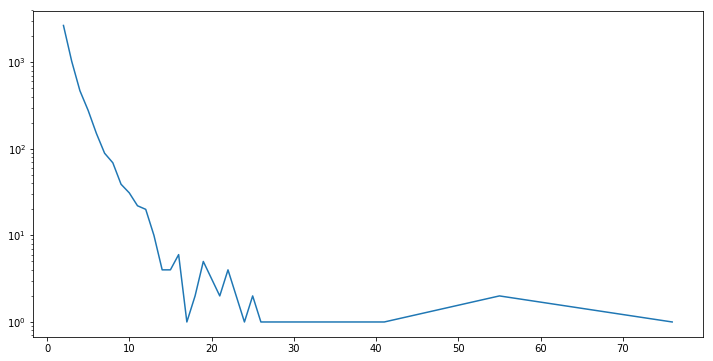

In [309]:
lens = list(snake_len_occur.keys())
lens.sort()
plt.figure(figsize=(12,6))
plt.semilogy(lens, [snake_len_occur[l] for l in lens])
plt.show()

In [359]:
len_entity_snake[5]

{601749861: 142,
 603102841: 142,
 604954847: 142,
 605312334: 142,
 605371123: 142,
 539827519: 171,
 539831641: 171,
 540590208: 171,
 541967304: 171,
 542270169: 171,
 553351488: 182,
 553361262: 182,
 553361264: 182,
 553522944: 182,
 597269540: 182,
 502089236: 268,
 502094493: 268,
 503287615: 268,
 519459327: 268,
 519459328: 268,
 491690036: 302,
 491720235: 302,
 491733833: 302,
 491747113: 302,
 491772969: 302,
 370230119: 681,
 370232642: 681,
 370232644: 681,
 370232646: 681,
 370234089: 681,
 370588392: 702,
 370588394: 702,
 370591791: 702,
 370593651: 702,
 370593653: 702,
 376356677: 951,
 376384917: 951,
 376384921: 951,
 376394228: 951,
 376394230: 951,
 567199047: 957,
 567203263: 957,
 567203865: 957,
 567210983: 957,
 567214156: 957,
 377907134: 1002,
 377971973: 1002,
 377971975: 1002,
 377985288: 1002,
 377985292: 1002,
 382470375: 1220,
 382470377: 1220,
 382470379: 1220,
 382470381: 1220,
 382470383: 1220,
 383682334: 1352,
 383682336: 1352,
 383682338: 1352,
 

In [350]:
# check intersection between snakes and heuristic 1
snake_heuristic1_intersection = set(heuristic_1_entity_node.keys()).intersection(set(entity_snake.keys()))
len(snake_heuristic1_intersection)

12

In [347]:
# check intersection between snakes and heuristic 2
snake_heuristic2_intersection = set(heuristic_2_entity_node_conf[3].keys()).intersection(set(entity_snake.keys()))
len(snake_heuristic2_intersection)

In [311]:
for e in snake_heuristic1_intersection:
    print()
    print('intersection entity:', e)
    n = heuristic_1_entity_node[e][0]
    print('linked node', n)
    if n in node_alias:
        print('node alias', node_alias[n])
    print('Number of entities related to the node:', len(heuristic_1_node_entity[n]))
    print('Snake ID', entity_snake[e])
    print('Number of entities in snake:', len(snake_entities[entity_snake[e]]))
    len_intersection = len(set(heuristic_1_node_entity[n]).intersection(set(snake_entities[entity_snake[e]])))    
    # how many of this linked entities are also in the snake?
    print(len_intersection, 'of which are in the corresponding snake')
    ll = snake_entities[entity_snake[e]]
    ll.sort()
    print('Snake start. Entity, address, entity is linked')
    for el in ll:
        print(el, funding_entity_addresses[el], el in heuristic_1_node_entity[heuristic_1_entity_node[e][0]])



intersection entity: 516487173
linked node 03d37fca0656558de4fd86bbe490a38d84a46228e7ec1361801f54f9437a18d618
node alias {'LNBIG.com [lnd-02]'}
Number of entities related to the node: 41
Snake ID 18961
Number of entities in snake: 2
1 of which are in the corresponding snake
Snake start. Entity, address, entity is linked
516487173 ['bc1qx47m0dt99erqy3h68v65qfmc4nakdvm92uzph7'] True
516487175 ['bc1qadtqn5szrppj5nk66mcxwlcqlyl00zdn9q05st'] False

intersection entity: 580819750
linked node 02ddc0e653386315299a8ca788c2e659f1ca6d96833c8abccdc7dcd84f4fad9700
node alias {'miningshed.com'}
Number of entities related to the node: 1
Snake ID 21675
Number of entities in snake: 2
1 of which are in the corresponding snake
Snake start. Entity, address, entity is linked
580819750 ['bc1qm3gggr4lhprncrln84e9u27kt2zyre04y67j3d'] True
580830071 ['bc1qrmgmjel2cmsadwd9kmngdy0vtclea3n7mcyyzv'] False

intersection entity: 533247144
linked node 0298f6074a454a1f5345cb2a7c6f9fce206cd0bf675d177cdbf0ca7508dd28852

Using the entities in the intersection between heuristic 1 and the snakes, we always get at most one linked entity. This means we could link all other entities in the snake to the LN node.

What are the nodes behind the funding txs creating the snake?

In [319]:
heuristic_1_entity_node[551421917] # snake start

['02529db69fd2ebd3126fb66fafa234fc3544477a23d509fe93ed229bb0e92e4fb8']

In [1]:
# # for each snake
# print('showing only long snakes')
# n_chars = 7
# for snake in snake_entities:
#     if len(snake_entities[snake]) > 10:
#         print()
#         print('snake ID:', snake)
#         sorted_entities = snake_entities[snake]
#         sorted_entities.sort()
#         print('entity    channel node1   node2')
#         for entity in sorted_entities:
#             ch_nodes = funding_entity_channels_nodes[entity]
#             for ch, nodes in ch_nodes.items():
#                 nodes.sort()
#                 print(entity, ch[:n_chars], nodes[0][:n_chars], nodes[1][:n_chars])


In [334]:
# for each snake
print('showing only intersection snakes')
n_chars = 7
for snake in snake_entities:
    if set(snake_entities[snake]).intersection(snake_heuristic1_intersection):
        print()
        print('snake ID:', snake)
        sorted_entities = snake_entities[snake]
        sorted_entities.sort()
        print('entity    channel node1   node2')
        for entity in sorted_entities:
            ch_nodes = funding_entity_channels_nodes[entity]
            for ch, nodes in ch_nodes.items():
                nodes.sort()
                print(entity, ch[:n_chars], nodes[0][:n_chars], nodes[1][:n_chars])


showing only intersection snakes

snake ID: 4390
entity    channel node1   node2
551421917 6eaecb5 02529db 03e2880
551454522 abb03a1 02529db 03e2880
551518808 cc029ea 02529db 03e2880
551560767 75c7a3a 02529db 03e2880
551576712 944fffa 02529db 03e2880
551586853 7ffdd7b 02529db 03e2880
551591461 f20879b 02529db 03e2880
551594233 1d91a58 02529db 03e2880
551717782 a5b2089 02529db 03e2880
551739679 8c7383b 02529db 03e2880
551741316 5c31a46 02529db 03e2880

snake ID: 6960
entity    channel node1   node2
561856858 710dd3e 035871b 0360e94
561860812 63d03cc 032cc45 0360e94
561865124 817b3d9 0353308 0360e94

snake ID: 13437
entity    channel node1   node2
580819678 9f1006d 03077fb 036665c
592705151 ca12fa8 036665c 036d110

snake ID: 18420
entity    channel node1   node2
533894483 e781d63 02a6de0 0390b5d
537263480 640f540 02a6de0 03d37fc

snake ID: 18961
entity    channel node1   node2
516487173 4afac92 02b6dab 03d37fc
516487175 88960a4 02725e5 03d37fc

snake ID: 20087
entity    channel node1   n

### Looking for some big sub graphs

In [185]:
# plot graph to see how entities are linked to nodes
G = nx.Graph()
i = 0
for entity, nodes in heuristic_1_entity_node.items():
    i += 1
    if i > 10000000:
        break
    for node in nodes:
        G.add_edge(node, entity)

node_color = []
for n in G:
    if isinstance(n, str):
        node_color.append('b')
    else:
        node_color.append('g')
len(G)

5483

In [ ]:
# plt.figure(figsize=(10,7))
# nx.draw(G, node_color=node_color, node_size=50)
# ax = plt.gca()
# ax.collections[0].set_edgecolor('#000000')
# plt.title('Green = Entity, Blue = Node')
# plt.show()

21

In [ ]:
# find if we have nodes linked together thanks to entities
sub_graphs = nx.connected_component_subgraphs(G)
for sg in sub_graphs:
    if '037ad988bfeca5885b3eab0abb9db4658bb31a6510a03b9181a754e480fc558338' in sg:
        print([n for n in sg])
#     n_nodes = 0
#     for n in sg:
# #         print(n)
#         if isinstance(n, str):
#             n_nodes += 1
#             if n_nodes > 1:
#                 print(n)
#                 if n in node_alias:
#                     print(node_alias[n])
#     if n_nodes > 1:
#         print(n_nodes, 'LN nodes in subgraph')

# Old sections

In [307]:
### bipartite graph
B = nx.Graph()

In [308]:
for e, ns in entity_selected_nodes.items():
    B.add_node(e, bipartite=0)
    for n in ns:
        B.add_node(n, bipartite=1)
        B.add_edge(e, n)

In [239]:
# UG = B.to_undirected()
# # extract subgraphs
# sub_graphs = nx.connected_component_subgraphs(UG)

# len([1 for sg in sub_graphs]) # number of subgraphs # 1539

In [326]:
# # make an undirected copy of the digraph
# UG = B.to_undirected()

# # extract subgraphs
# sub_graphs = nx.connected_component_subgraphs(UG)

# for i, sg in enumerate(sub_graphs):
#     X = set()
#     Y = set()
    
#     for node in sg:
#         if isinstance(node, int):
#             X.add(node)
#         else:
#             Y.add(node)

#     fig_factor = 2

#     plt.figure(figsize=(fig_factor*4,fig_factor*3))
#     # plt.figure(figsize=(10,8))
#     # pos = nx.circular_layout(g) # good
#     # pos = nx.shell_layout(g) # good
#     # pos = nx.spring_layout(g) # meh
#     # pos = nx.spectral_layout(g) bad
#     # pos = nx.fruchterman_reingold_layout(g) # ok

#     pos = dict()
#     pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
#     pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2

#     nx.draw(sg, pos)
# #     nx.draw(sg, pos, arrows=True, arrowsize=30, node_color=node_color)
# #     nx.draw_networkx_labels(sg, pos_label, labels=nx.get_node_attributes(sg,'text'), font_size=40)

#     ax= plt.gca()
#     ax.collections[0].set_edgecolor('#000000')
#     ax.margins(.4, .1)
#     # plt.savefig(title)
#     plt.show()    



# find entry points
- create network of funding txs: addresses are nodes, directed edges are payments
- entry point: `in_degree == 0` and `out_degree > 0` and these are the only txs
- possible exit point: `in_degree > 0` and `out_degree == 0` and these are the only txs
- real exit point: possible exit point +  money is spent in a non-funding tx
- passage point: `in_degree == out_degree`

In [195]:
G = nx.DiGraph()
for tx in funding_txs.values():
    for i in tx['inputs']:
        in_address = i['address']
        for out in tx['outputs']:
            out_address = out['address']
            G.add_edge(in_address, out_address)

In [240]:
# sg.edges

### entry points

In [200]:
possible_entry_points_1 = set([node for (node, val) in G.in_degree() if val == 0])
possible_entry_points_2 = set([node for (node, val) in G.out_degree if val > 0])

In [202]:
len(possible_entry_points_1.intersection(possible_entry_points_2))

76686

In [203]:
len(G.nodes)

216068

### passage points

In [207]:
in_degreee_1 = set([node for (node, val) in G.in_degree() if val == 1])
out_degreee_1 = set([node for (node, val) in G.out_degree() if val == 1])

In [209]:
len(in_degreee_1.intersection(out_degreee_1))

429